<a href="https://colab.research.google.com/github/shreyas-sreedhar/ipl-data-analysis/blob/main/DSETM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO6105 - ASSIGNMENT_2**

**

*` - Shreyas S Sreedhar 002874944`*

Dataset Link - https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020


CSV - IPL Ball-by-Ball 2008-2020.csv CSV 2 - IPL Matches 2008-2020.csv

### IPL Ball-by-Ball 2008-2020 Ball_by_Ball Dataset

The dataset contains detailed information about each ball bowled in IPL matches during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match.
- **inning**: The inning number (1 or 2).
- **over**: The over number in the inning.
- **ball**: The ball number within the over.
- **batsman**: The name of the batsman on strike.
- **non_striker**: The name of the non-striker batsman.
- **bowler**: The name of the bowler.
- **batsman_runs**: The number of runs scored by the batsman off the ball.
- **extra_runs**: The number of extra runs conceded (like wides, no balls).
- **total_runs**: Total runs scored off the ball (batsman_runs + extra_runs).
- **non_boundary**: Indicator if the runs were scored without a boundary.
- **is_wicket**: Indicator if a wicket was taken on the ball.
- **dismissal_kind**: The type of dismissal, if applicable.
- **player_dismissed**: The name of the dismissed player, if applicable.
- **fielder**: The name of the fielder involved in the dismissal, if applicable.
- **extras_type**: The type of extra run conceded, if applicable.
- **batting_team**: The name of the batting team.
- **bowling_team**: The name of the bowling team.

Using this dataset for various data analysis and exploration tasks related to IPL matches till 2020


### IPL Matches 2008-2020 Matches Dataset

The dataset contains information about IPL matches played during the years 2008-2020.

#### Columns:

- **id**: Unique identifier for each match, same as in the ball-by-ball dataset.
- **city**: City where the match was played.
- **date**: Date of the match.
- **player_of_match**: Player who was awarded the 'Player of the Match'.
- **venue**: Venue where the match was played.
- **neutral_venue**: Indicator if the venue was neutral.
- **team1** and **team2**: Teams playing the match.
- **toss_winner**: Team that won the toss.
- **toss_decision**: Decision made by the toss winner to bat or field.
- **winner**: Winning team of the match.
- **result**: Type of result (e.g., runs, wickets).
- **result_margin**: Margin of the win.
- **eliminator**: Indicator if the match was an eliminator.
- **method**: Any special method applied (like D/L method).
- **umpire1** and **umpire2**: Names of the umpires.




In [2]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=fd5785b1f3d21ed3ef3cbed6804f4e4586959be7d083958617ba05d121486ca2
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import pandas as pd
import seaborn as sns
import psutil

In [4]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
6
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

6
Checking whether there is an H2O instance running at http://localhost:43471..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn4yuzc14
  JVM stdout: /tmp/tmpn4yuzc14/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn4yuzc14/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:43471
Connecting to H2O server at http://127.0.0.1:43471 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_7ncyk6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
ipl_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv"
)
ipl_matches_data = pd.read_csv(
    "https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Matches%202008-2020.csv"
)

In [6]:
ipl_data.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [7]:
# Viewing data in the file
ipl_matches_data.head()
dff = ipl_matches_data

In [8]:
df = h2o.import_file(path='https://raw.githubusercontent.com/shreyas-sreedhar/ipl-data-analysis/main/IPL%20Ball-by-Ball%202008-2020.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
df.describe(chunk_summary=True)

Rows:193468
Cols:18

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              1        0.694445            80  B     0.00196733
CXI           Sparse Integers            39       27.0833             138.5 KB  3.48783
C1N           1-Byte Integers (w/o NAs)  56       38.8889             1.3 MB    33.3974
C2            2-Byte Integers            40       27.7778             1.8 MB    47.6438
C2S           2-Byte Fractions           3        2.08333             142.3 KB  3.5825
C4            4-Byte Integers            5        3.47222             472.0 KB  11.8865

Frame distribution summary: 
                 size    number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  ------  ----------------  -----------------------------  ------------------
127.0.0.1:43471  3.9 MB  193468            8                              144
mean             3.9 MB  193468            8                              144
min              3.9 MB  193468            8                              144
max              3.9 MB  193468            8                              144
stddev           0  B    0                 0                              0
total            3.9 MB  193468            8                              144

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
type,int,int,int,int,enum,enum,enum,int,int,int,int,int,enum,enum,enum,enum,enum,enum
mins,335982.0,1.0,0.0,1.0,,,,0.0,0.0,0.0,0.0,0.0,,,,,,
mean,756768.8084386048,1.482131411913079,9.177026691752655,3.6159674985010457,,,,1.240230942584821,0.06641408398288089,1.3066450265677005,8.270101515496103e-05,0.049077883681022186,,,,,,
maxs,1237181.0,2.0,19.0,9.0,,,,6.0,7.0,7.0,1.0,1.0,,,,,,
sigma,306097.0914176313,0.4996819029337365,5.67684789466175,1.8071276073795628,,,,1.610866552047968,0.3399913362666675,1.5988017649331967,0.009093657302209603,0.216031215893172,,,,,,
zeros,0,0,10254,0,,,,77637,183235,67841,193452,183973,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,335982.0,1.0,6.0,5.0,RT Ponting,BB McCullum,AA Noffke,1.0,0.0,1.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982.0,1.0,6.0,6.0,BB McCullum,RT Ponting,AA Noffke,1.0,0.0,1.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982.0,1.0,7.0,1.0,BB McCullum,RT Ponting,Z Khan,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [10]:
import plotly.express as px
import pandas as pd


# Create a histogram of the result_margin column
fig = px.histogram(dff, x='result_margin',
                   title='Distribution of Match Result Margins',
                   labels={'result_margin': 'Result Margin'}, # can adjust label as needed
                   nbins=30, # Adjust the number of bins as needed for granularity
                   marginal='box', # Add a boxplot to the top of the histogram
                   color_discrete_sequence=['indianred'] # Color of the histogram bars
                  )

# Update layout if needed
fig.update_layout(bargap=0.2) # Adjust the gap between bars

fig.show()


In [11]:
train, test = df.split_frame(ratios=[0.8], seed = 1)

In [12]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

In [13]:
df.types


{'id': 'int',
 'inning': 'int',
 'over': 'int',
 'ball': 'int',
 'batsman': 'enum',
 'non_striker': 'enum',
 'bowler': 'enum',
 'batsman_runs': 'int',
 'extra_runs': 'int',
 'total_runs': 'int',
 'non_boundary': 'int',
 'is_wicket': 'int',
 'dismissal_kind': 'enum',
 'player_dismissed': 'enum',
 'fielder': 'enum',
 'extras_type': 'enum',
 'batting_team': 'enum',
 'bowling_team': 'enum'}

In [14]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [15]:
print(df_train.shape)
print(df_test.shape)

(154874, 18)
(38594, 18)


In [16]:
X=df.columns
print(X)

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [17]:
predictors = X
response = 'total_runs'

In [18]:
#Seperate Dependent variable from Independent variable
y_numeric ='total_runs'
X.remove(y_numeric)
print(X)

['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'non_boundary', 'is_wicket', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [19]:

# Set up AutoML
aml = H2OAutoML(max_runtime_secs=100, seed=1)

## Independent Variables (Features)

These are the variables that could influence the outcome of the match. They do not change based on other variables in this dataset:

- **city**: The city in which the match is played could affect the outcome due to home advantage, weather conditions, etc.
- **date**: The date of the match might influence the outcome due to various factors like player conditions, daylight, etc.
- **venue**: Similar to the city, but more specific; certain teams may perform better at specific venues.
- **neutral_venue**: Indicates whether the venue is neutral or not, which could influence team performance.
- **team1, team2**: The teams playing the match. Their strengths and weaknesses are likely to influence the match outcome.
- **toss_winner**: The team winning the toss, which can be crucial in deciding the match outcome depending on the toss decision.
- **toss_decision**: Whether the toss-winning team chooses to bat or bowl first, which can significantly influence the game's outcome.
- **eliminator**: Indicates if the match is an eliminator, which might add pressure affecting the teams' performances.
- **method**: Refers to any match-specific methods used, like the Duckworth-Lewis method, which could influence the final outcome.

## Dependent Variable (Target)

This is the variable you are trying to predict or explain, which depends on the independent variables:

- **winner**: The team that won the match. This is a direct outcome of the match and is influenced by the independent variables listed above.


In [20]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240220_43034


GLM Model: summary
    family    link      regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------
    gaussian  identity  Ridge ( lambda = 1.564E-4 )  nlambda = 30, lambda.max = 156.44, lambda.min = 1.564E-4, lambda.1se = -1.0  2929                          2668                           30                      AutoML_1_20240220_43034_training_py_5_sid_9212

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.250576396993735e-07
RMSE: 0.0003536348960430425
MAE: 0.0002247764482737398
RMSLE: 0.0001504066665285105
Mean Residual Deviance: 1.250576396993735e-07
R^2: 0.9999999510696085
Null degrees of freedom: 108347
Residual degrees of freedom: 105679
Null deviance: 276918.79706134624
Residual deviance: 0.01354974514614772
AIC: -1409318.0160471858

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1.3812977729425082e-07
RMSE: 0.00037165814573913324
MAE: 0.00023267097142940277
RMSLE: 0.0001546505096502056
Mean Residual Deviance: 1.3812977729425082e-07
R^2: 0.9999999465098609
Null degrees of freedom: 15381
Residual degrees of freedom: 12713
Null deviance: 39723.682316266
Residual deviance: 0.002124712234340166
AIC: -193967.5752145906

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train          deviance_test           alpha    iterations    training_rmse          training_deviance      training_mae           training_r2         validation_rmse         validation_deviance     validation_mae          validation_r2
---  -------------------  ----------  -----------  --------  ------------  ----------------------  ----------------------  -------  ------------  ---------------------  ---------------------  ---------------------  ------------------  ----------------------  ----------------------  ----------------------  ------------------
     2024-02-20 04:31:07  0.000 sec   1            .16E3     2669          2.5232046459312443      2.5496124007633325      0.0
     2024-02-20 04:31:09  1.720 sec   2            .97E2     2669          2.5036246049747475      2.529885733211981       0.0
     2024-02-20 04:31:09  2.159 sec   3            .6E2      2669          2.472594388225933       2.4986221990262143      0.0
     2024-02-20 04:31:10  2.403 sec   4            .37E2     2669          2.423891065724429       2.449549772367802       0.0
     2024-02-20 04:31:10  2.520 sec   5            .23E2     2669          2.348649635004023       2.3737323746226213      0.0      5             0.0003536348960430425  1.250576396993735e-07  0.0002247764482737398  0.9999999510696085  0.00037165814573913324  1.3812977729425082e-07  0.00023267097142940277  0.9999999465098609
     2024-02-20 04:31:10  2.634 sec   6            .14E2     2669          2.235009218892227       2.2592094366174047      0.0
     2024-02-20 04:31:10  2.745 sec   7            .9E1      2669          2.0694430701052102      2.092322972615923       0.0
     2024-02-20 04:31:10  2.878 sec   8            .56E1     2669          1.840630924154846       1.8616142295532632      0.0
     2024-02-20 04:31:10  3.018 sec   9            .35E1     2669          1.5472228350746007      1.5656331869133686      0.0
     2024-02-20 04:31:10  3.158 sec   10           .21E1     2669          1.2068691787784354      1.2220551062500422      0.0
---  ---                  ---         ---          ---       ---           ---                     ---                     ---      ---  

In [21]:
print(aml.leaderboard)


model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance
GLM_1_AutoML_1_20240220_43034                           0.000371658  1.3813e-07   0.000232671  0.000154651               1.3813e-07
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_43034  0.000421728  1.77854e-07  0.00027597   0.000181654               1.77854e-07
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_43034  0.00698708   4.88192e-05  0.00238191   0.00256156                4.88192e-05
XGBoost_1_AutoML_1_20240220_43034                       0.0156692    0.000245524  0.00238479   0.00548441                0.000245524
GBM_1_AutoML_1_20240220_43034                           0.0931681    0.00868029   0.0561663    0.0457744                 0.00868029
DRF_1_AutoML_1_20240220_43034                           0.157136     0.0246916    0.0449762    0.055678                  0.0246916
XGBoost_2_AutoML_1_20240220_43034                       0.436826     0.19

In [22]:
#assign index values to all the models generated
sorted_models = aml.leaderboard.sort(by='rmse')

# Select the best model (the one with the lowest mean_per_class_error)
best_model = sorted_models[0]

# Print the details of the best model
print("Best Model:")
print(best_model)

Best Model:
model_id
GLM_1_AutoML_1_20240220_43034
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_43034
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_43034
XGBoost_1_AutoML_1_20240220_43034
GBM_1_AutoML_1_20240220_43034
DRF_1_AutoML_1_20240220_43034
XGBoost_2_AutoML_1_20240220_43034
GBM_2_AutoML_1_20240220_43034
GBM_3_AutoML_1_20240220_43034
GBM_4_AutoML_1_20240220_43034
[10 rows x 1 column]



In [23]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 1.2797424410328687e-07
RMSE: 0.0003577348796291562
MAE: 0.00022723100347100643
RMSLE: 0.00015147466209651444
Mean Residual Deviance: 1.2797424410328687e-07
R^2: 0.9999999500398671
Null degrees of freedom: 38656
Residual degrees of freedom: 35988
Null deviance: 99021.89240225879
Residual deviance: 0.004947100354300761
AIC: -498498.3190550261

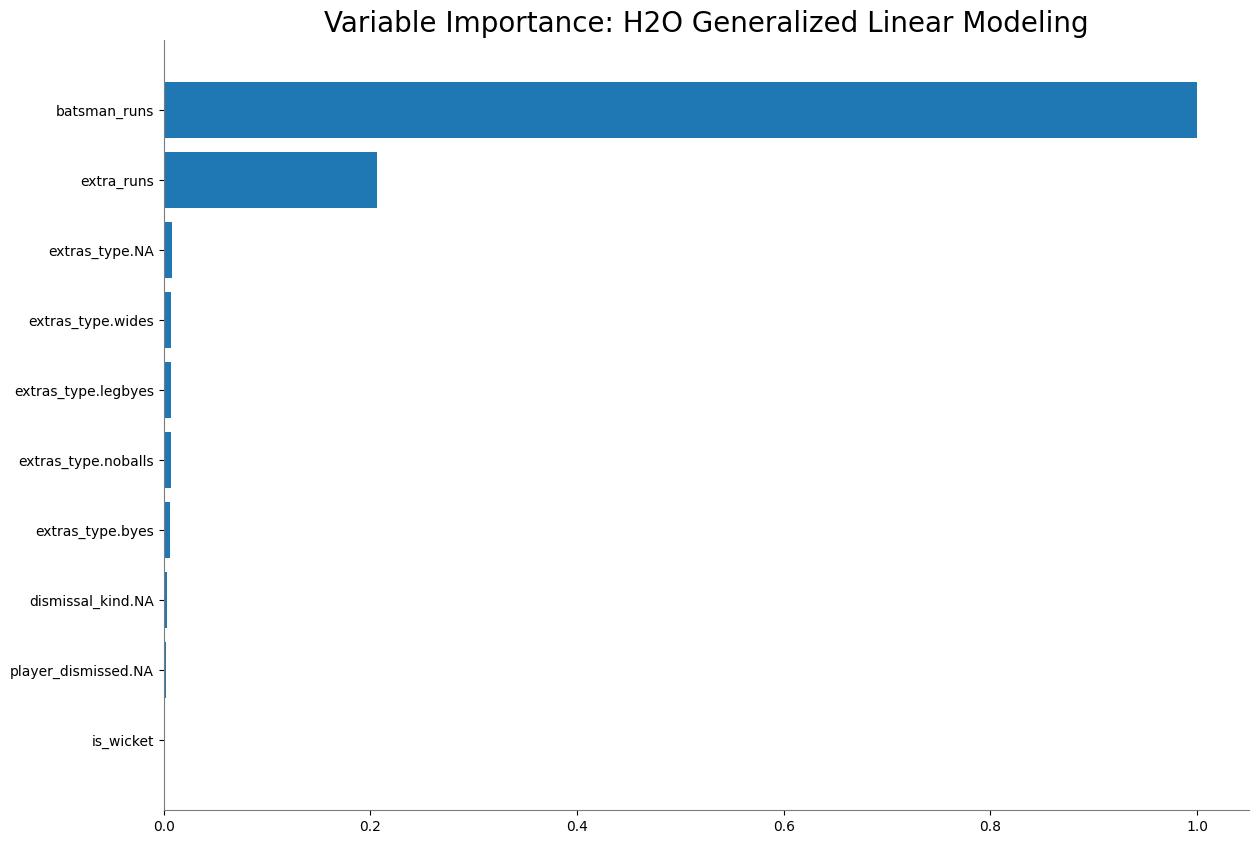

<Figure size 640x480 with 0 Axes>

In [24]:
%matplotlib inline
best_model.varimp_plot()

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

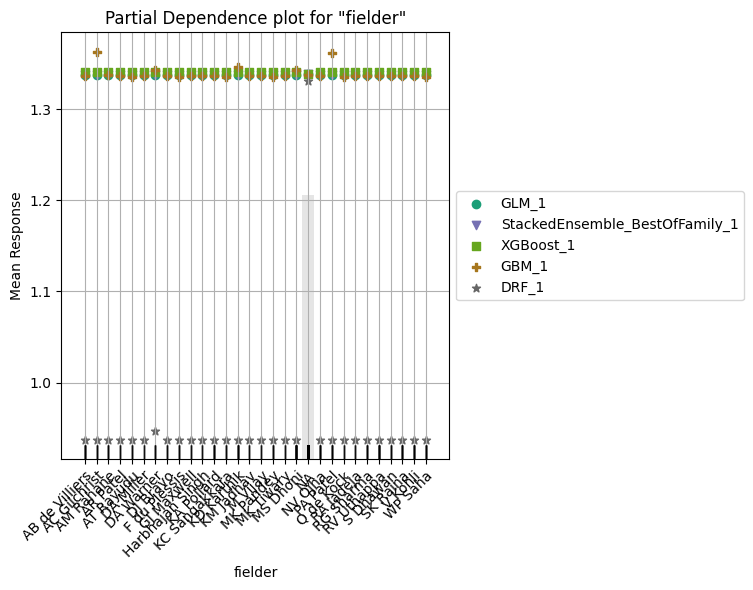

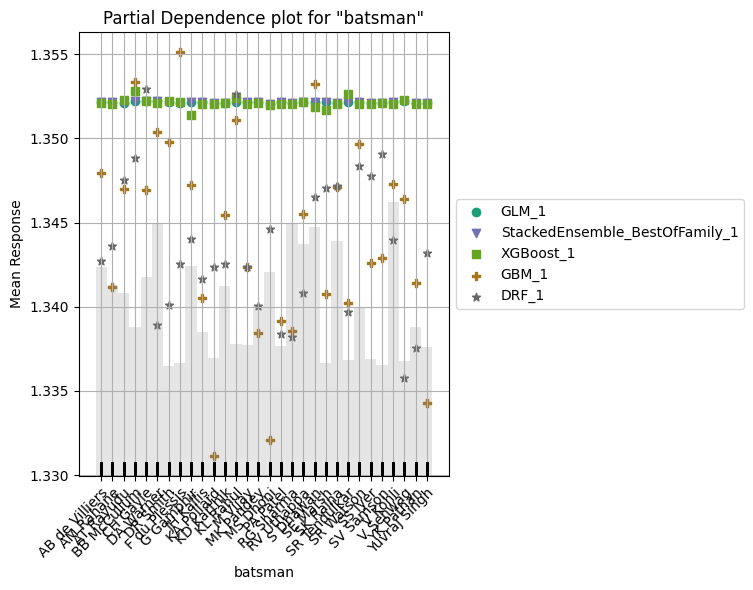

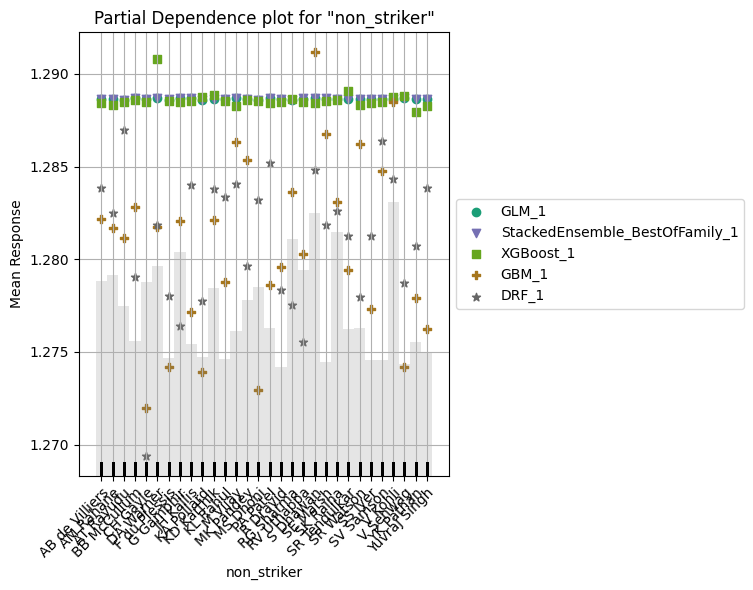

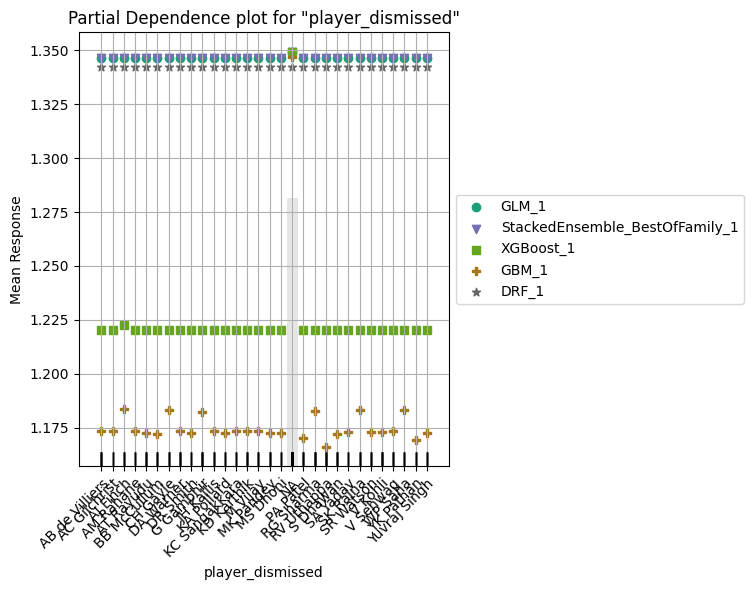

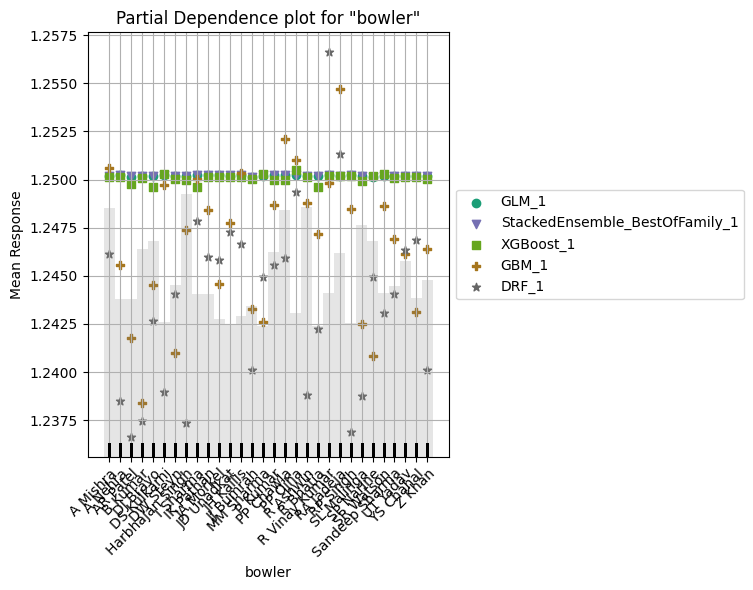

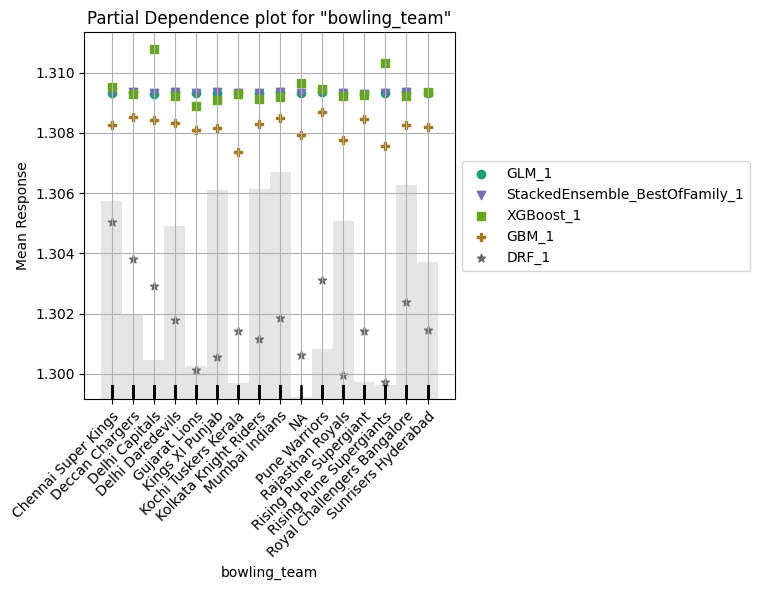

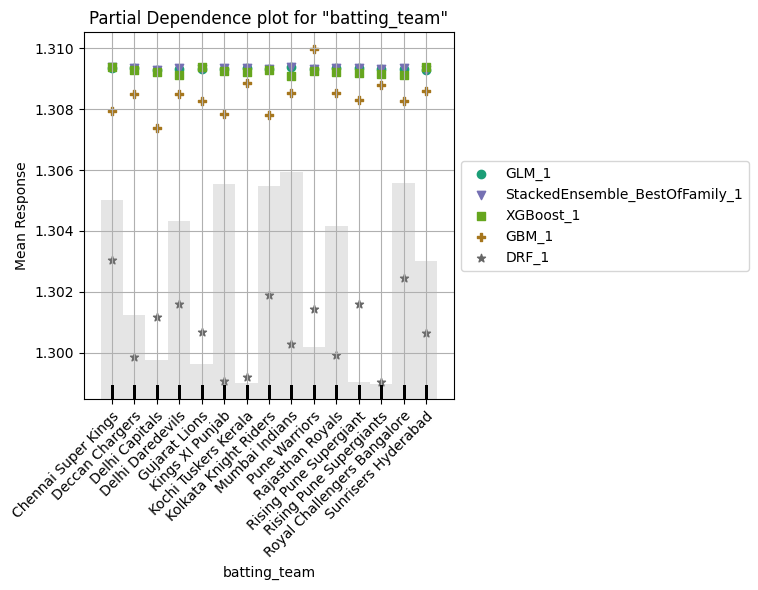

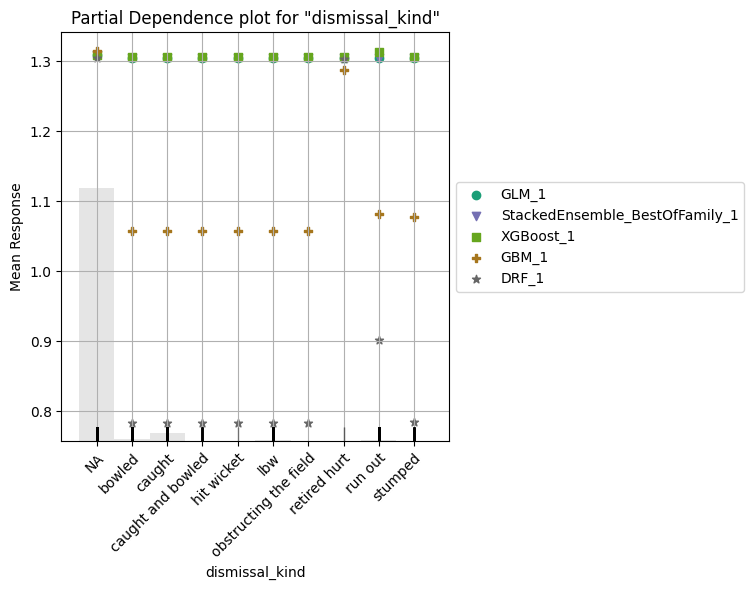

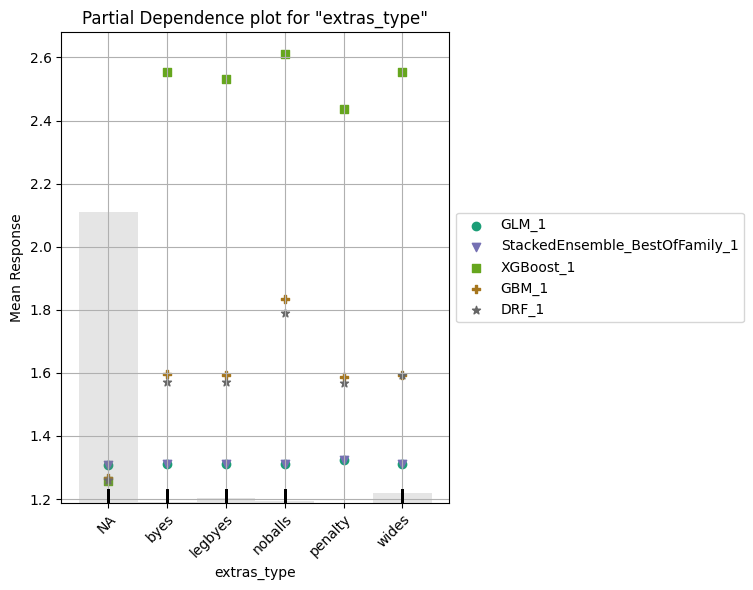

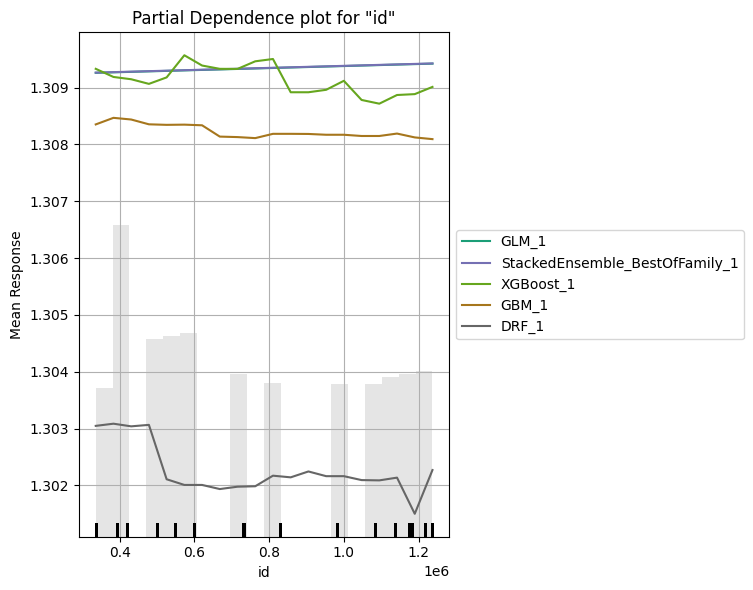

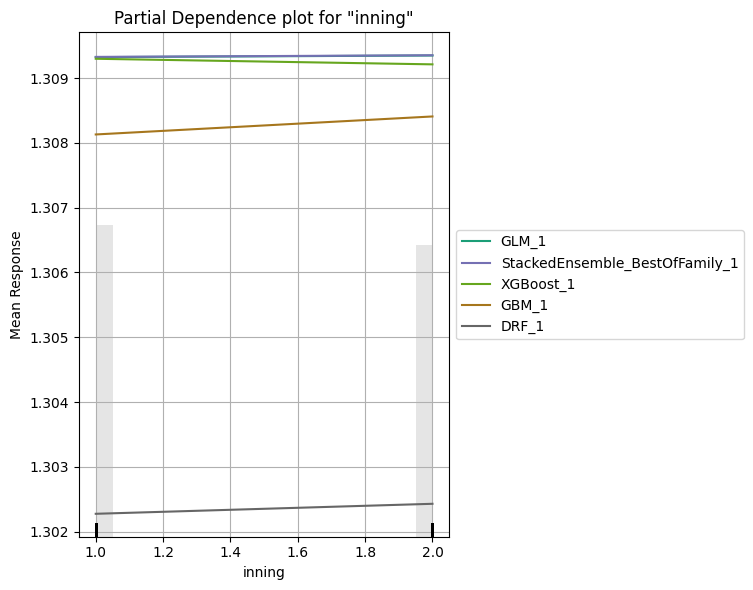

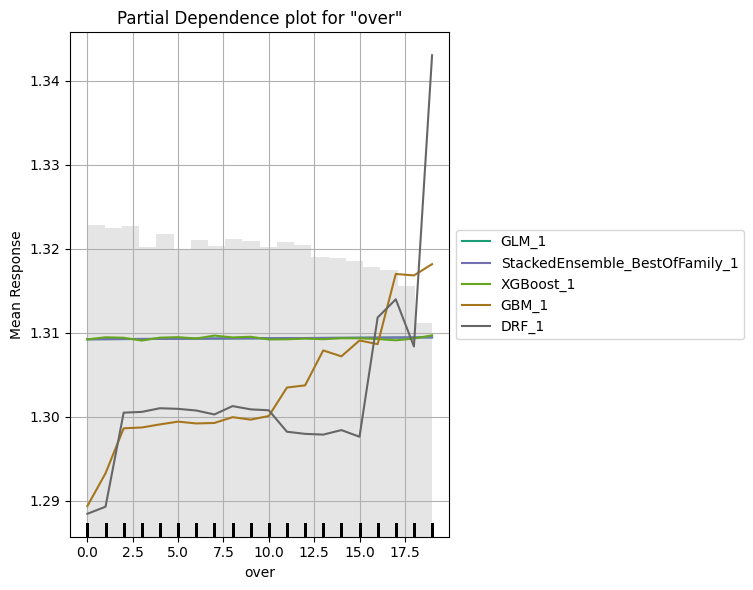

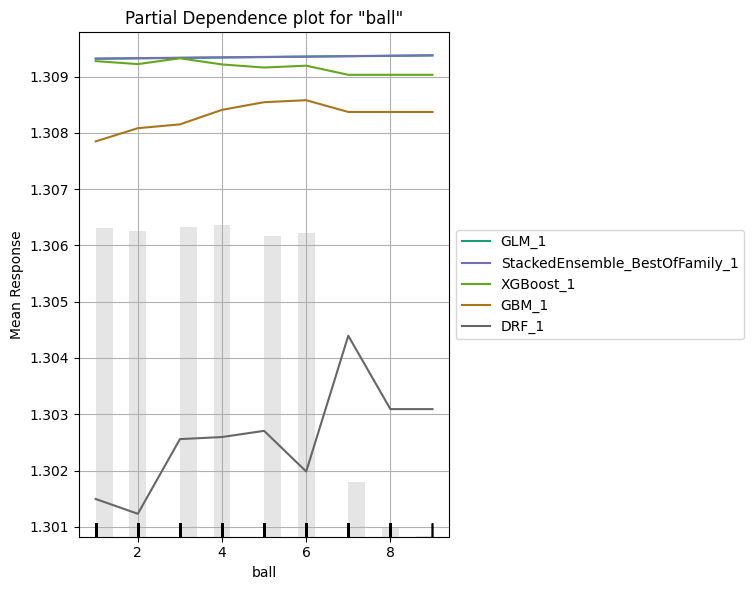

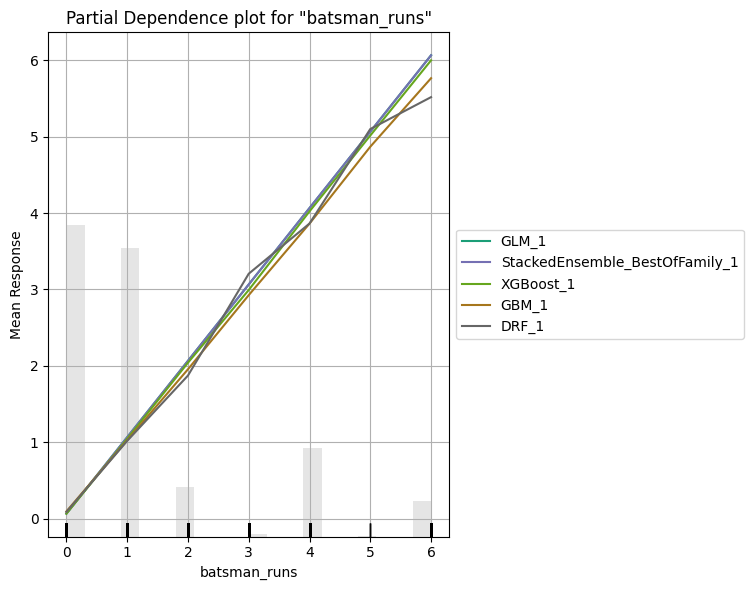

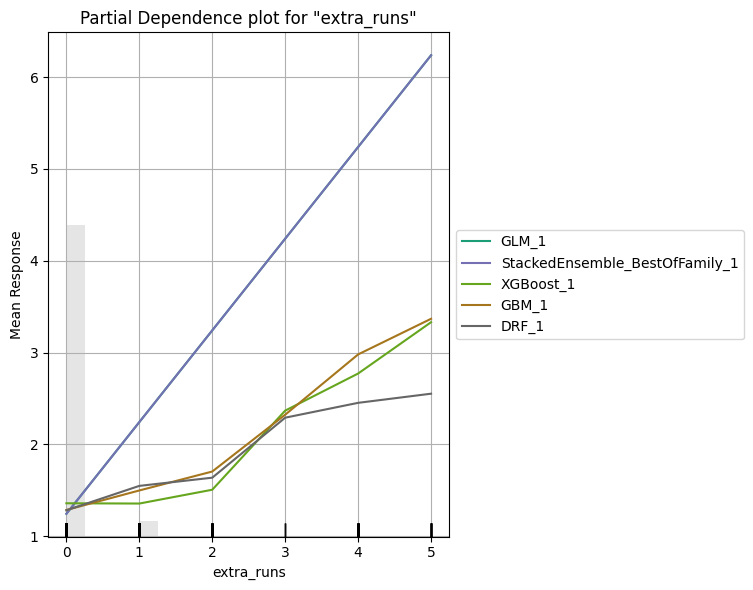

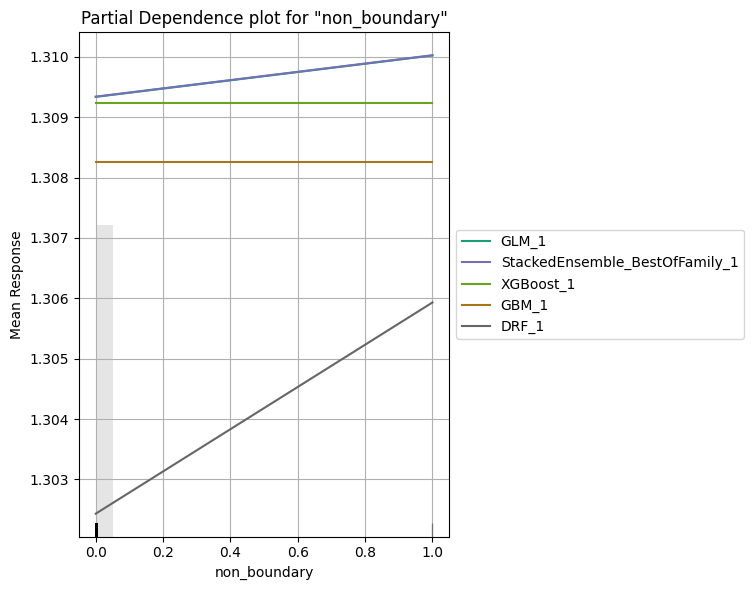

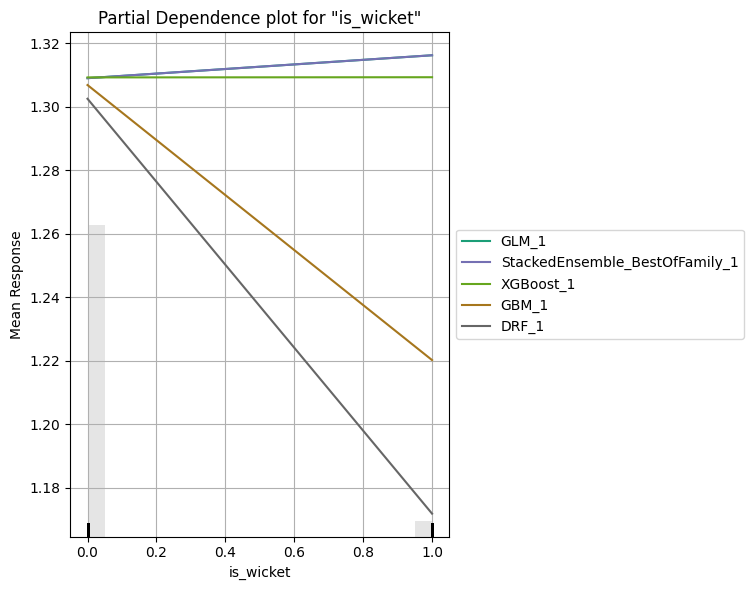

In [25]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

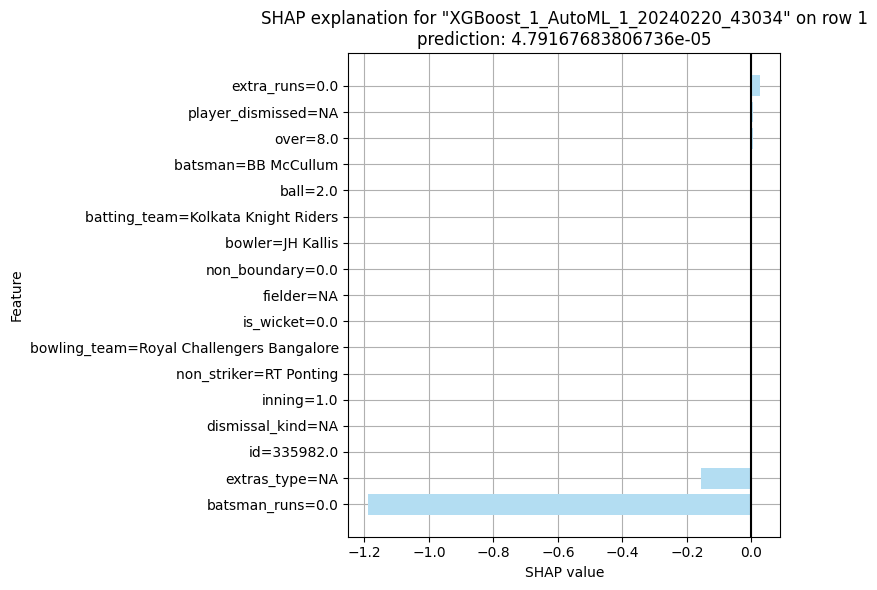

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

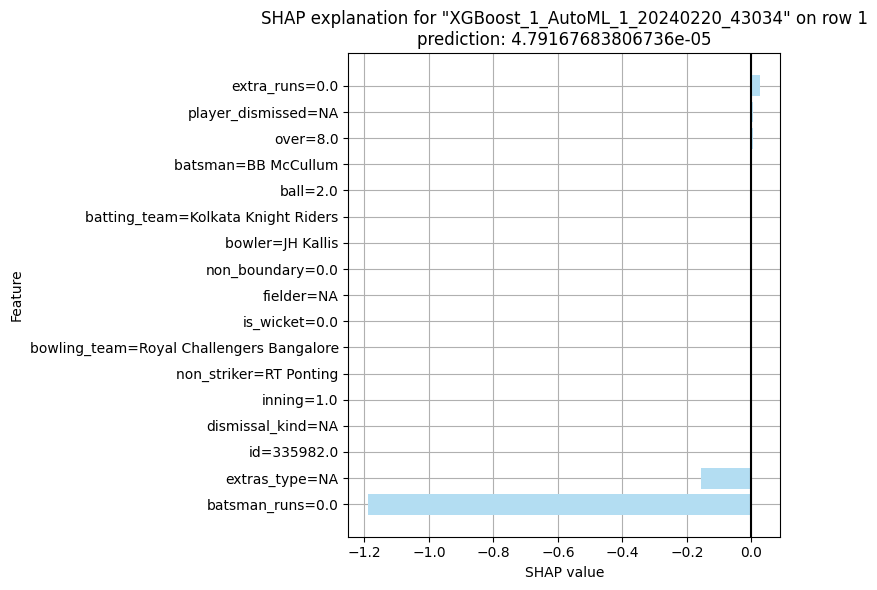

In [26]:
aml.explain_row(frame = test, row_index = 1, figsize = (8,6), exclude_explanations = "leaderboard")

# Ridge Regularization in H20

In [27]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# set the response column and predictor columns
response_col = "is_wicket"
predictor_cols = df.columns
predictor_cols.remove("is_wicket")

# create a logistic regression model with Ridge regularization
glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=0, lambda_=0.1)

# train the model on your data
glm.train(x=predictor_cols, y=response_col, training_frame=train)

# view the model performance metrics
print(glm.model_performance())

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning:

We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.



██████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.035760986517059716
RMSE: 0.18910575484913122
LogLoss: 0.12956083688966125
AUC: 0.9998589268490415
AUCPR: 0.9997678190938608
Gini: 0.9997178536980831
Null degrees of freedom: 154810
Residual degrees of freedom: 151993
Null deviance: 60752.79640462212
Residual deviance: 40114.88543945069
AIC: 45750.88543945069

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07671076987040022
       0       1     Error    Rate
-----  ------  ----  -------  --------------
0      147191  0     0        (0.0/147191.0)
1      2       7618  0.0003   (2.0/7620.0)
Total  147193  7618  0        (2.0/154811.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0767108    0.999869  146
max f2                       0.07

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_1_20240220_43034,0.000360678,1.30089e-07,0.000226694,0.00015168,1.30089e-07,9058,0.001704,GLM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_43034,0.000410595,1.68588e-07,0.000269646,0.000179301,1.68588e-07,4452,0.002738,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_43034,0.00552526,3.05285e-05,0.00226567,0.00241789,3.05285e-05,2703,0.103121,StackedEnsemble
XGBoost_1_AutoML_1_20240220_43034,0.0122724,0.000150612,0.00212852,0.00515439,0.000150612,29552,0.01375,XGBoost
GBM_1_AutoML_1_20240220_43034,0.0904783,0.00818633,0.0555593,0.045806,0.00818633,40532,0.101571,GBM
DRF_1_AutoML_1_20240220_43034,0.149934,0.0224803,0.0425959,0.0527239,0.0224803,2955,0.008841,DRF
XGBoost_2_AutoML_1_20240220_43034,0.430858,0.185639,0.276888,0.115636,0.185639,2970,0.002413,XGBoost
GBM_2_AutoML_1_20240220_43034,0.497874,0.247878,0.363831,0.219069,0.247878,2202,0.011753,GBM
GBM_3_AutoML_1_20240220_43034,0.547149,0.299372,0.400507,0.238534,0.299372,2407,0.007701,GBM
GBM_4_AutoML_1_20240220_43034,0.551428,0.304073,0.404606,0.242236,0.304073,2122,0.009896,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

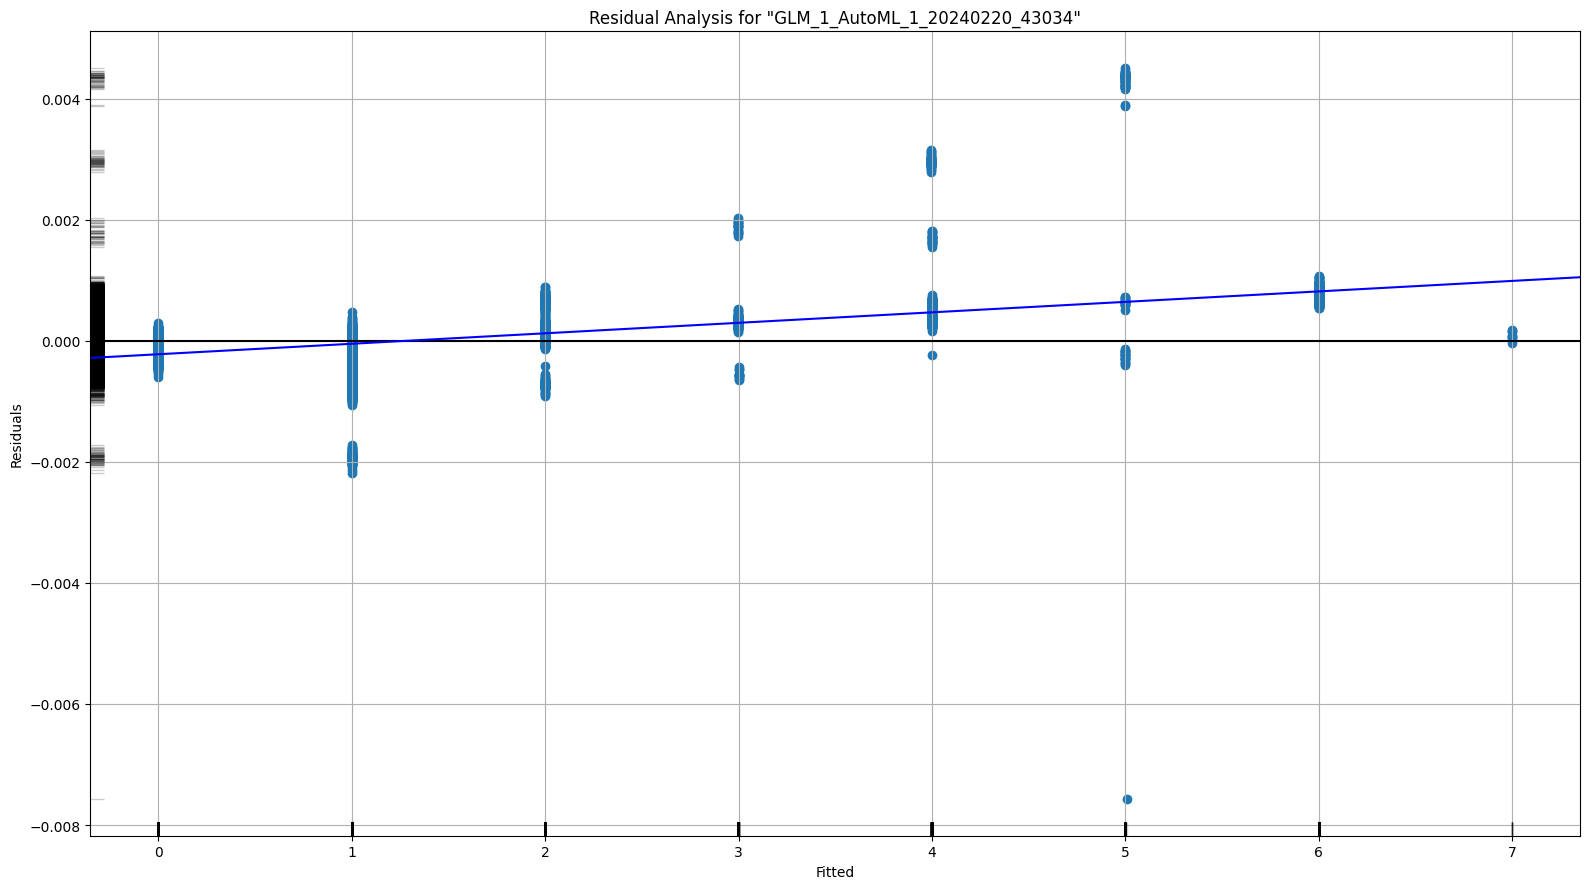

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

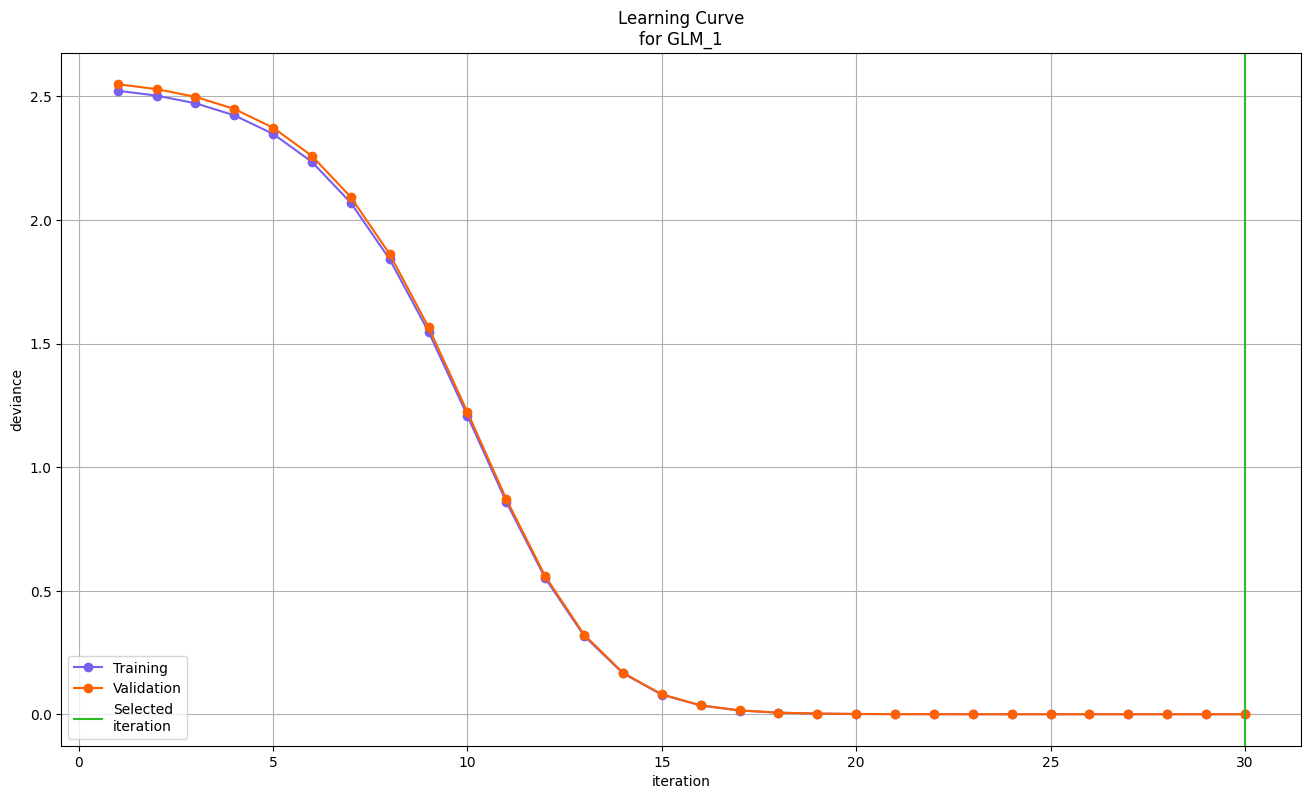

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

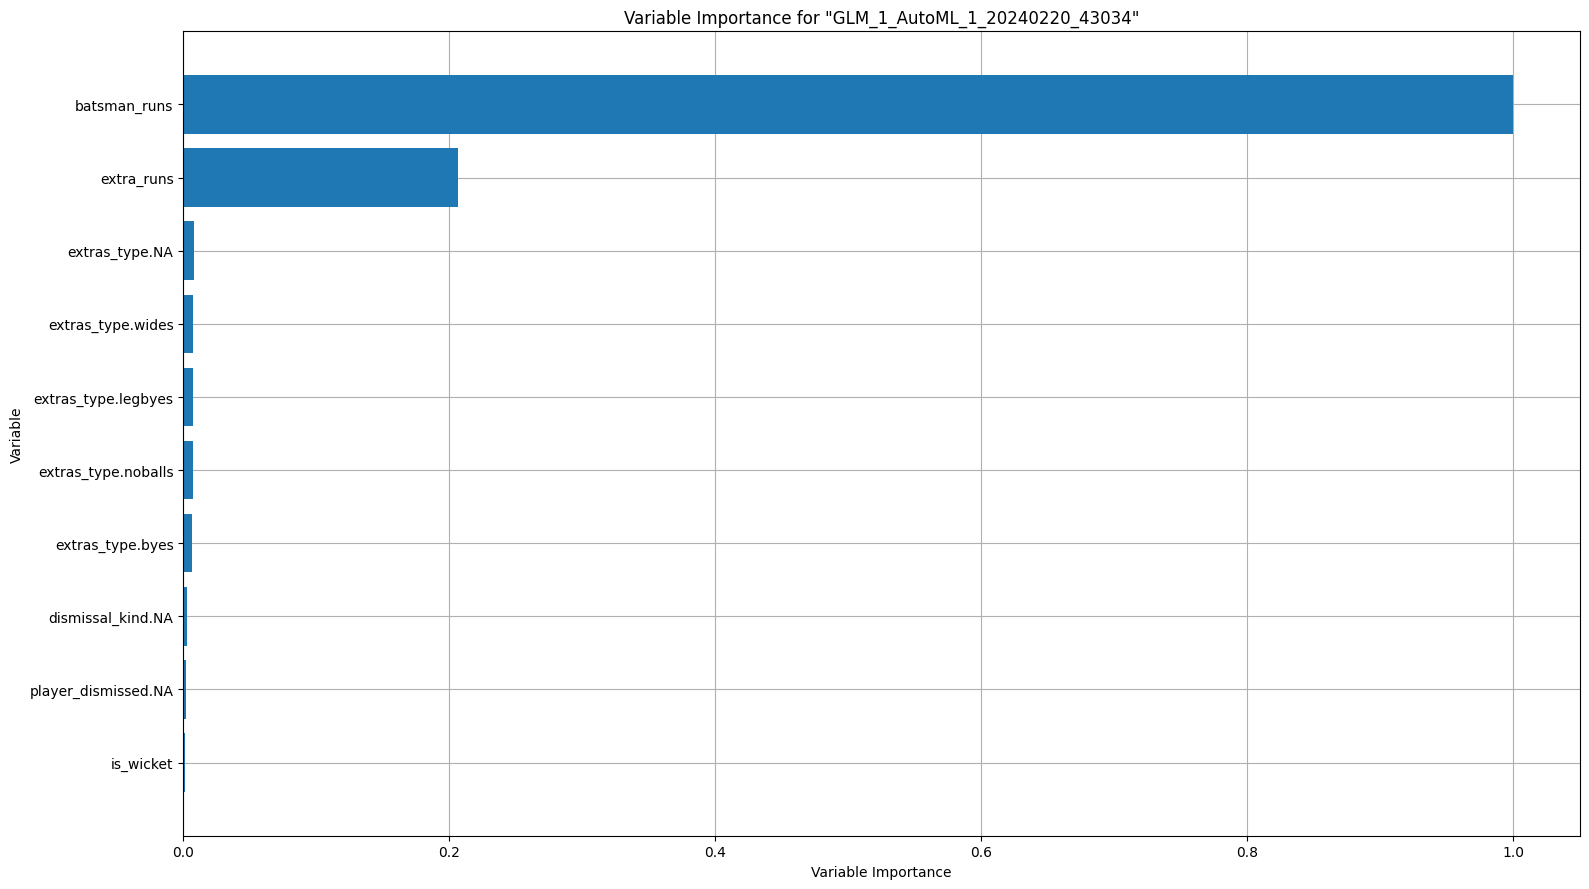

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

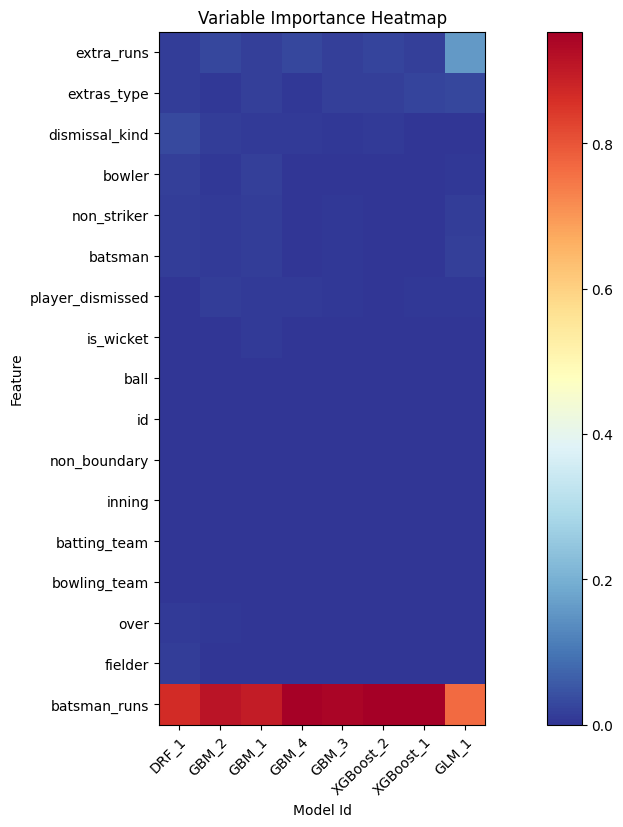

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

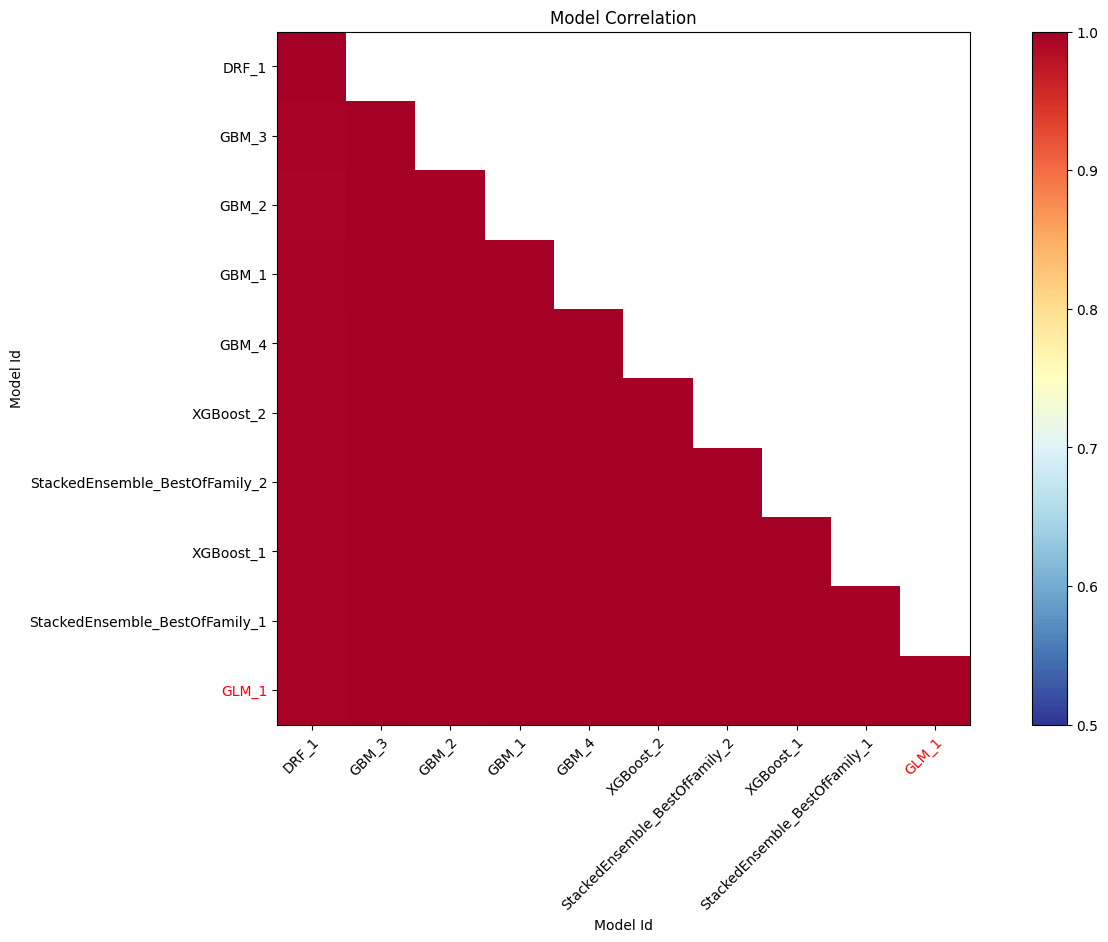

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:611: RuntimeWarning:

invalid value encountered in divide



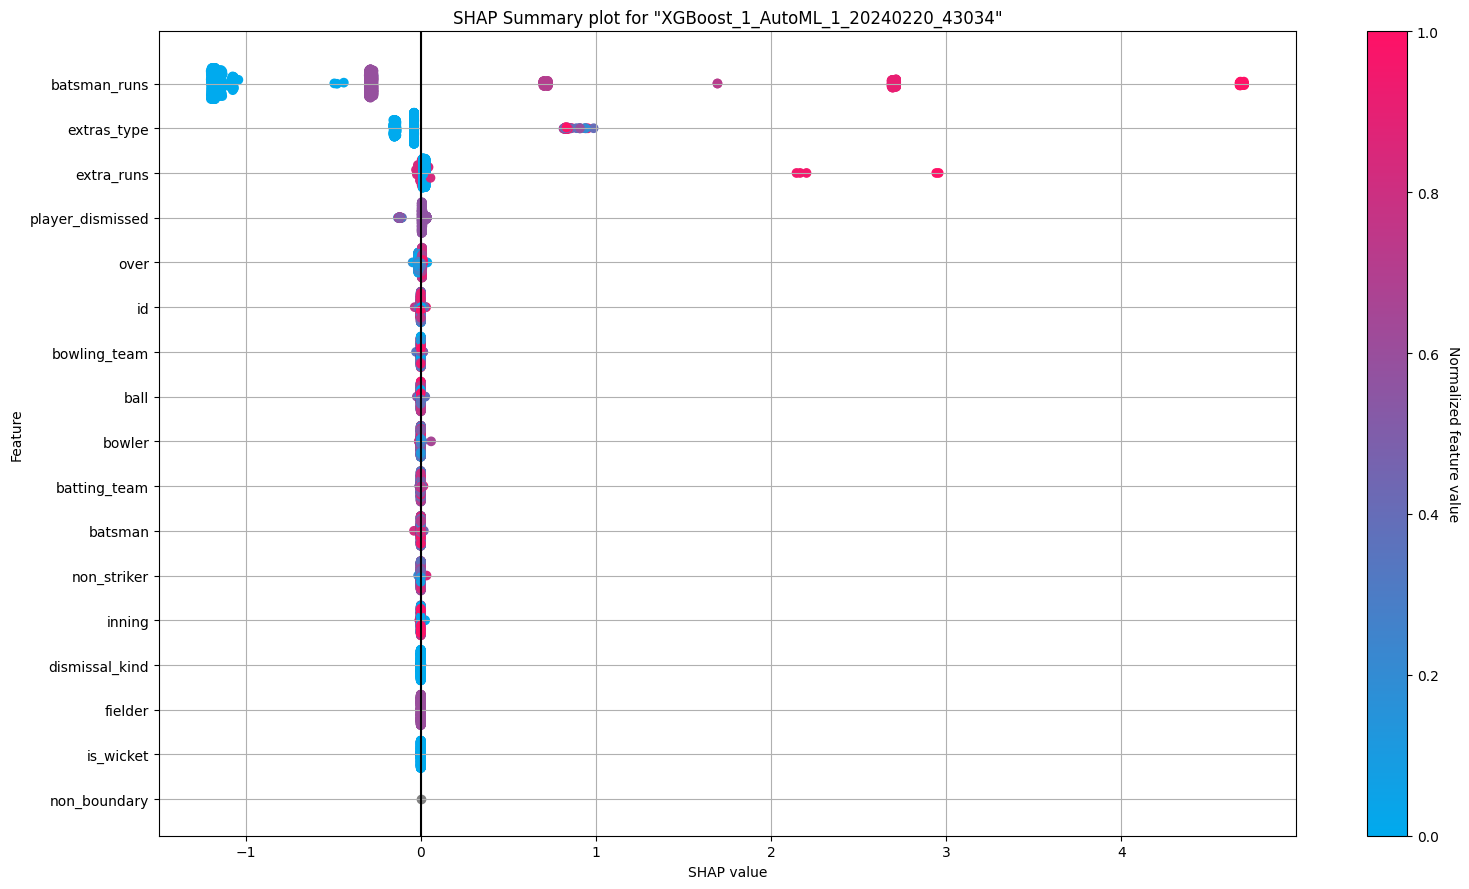

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

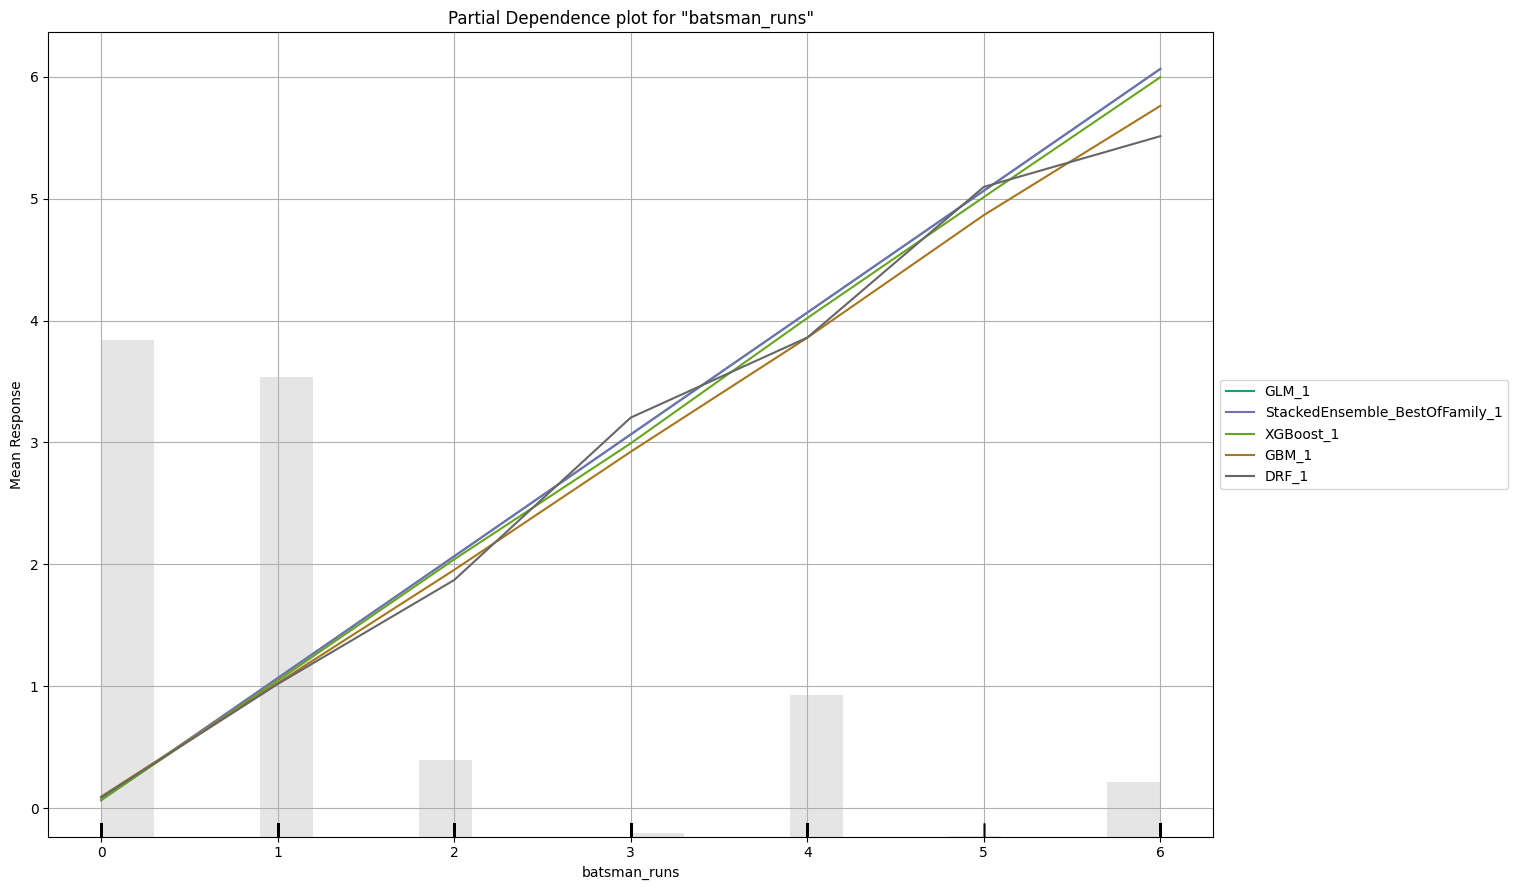

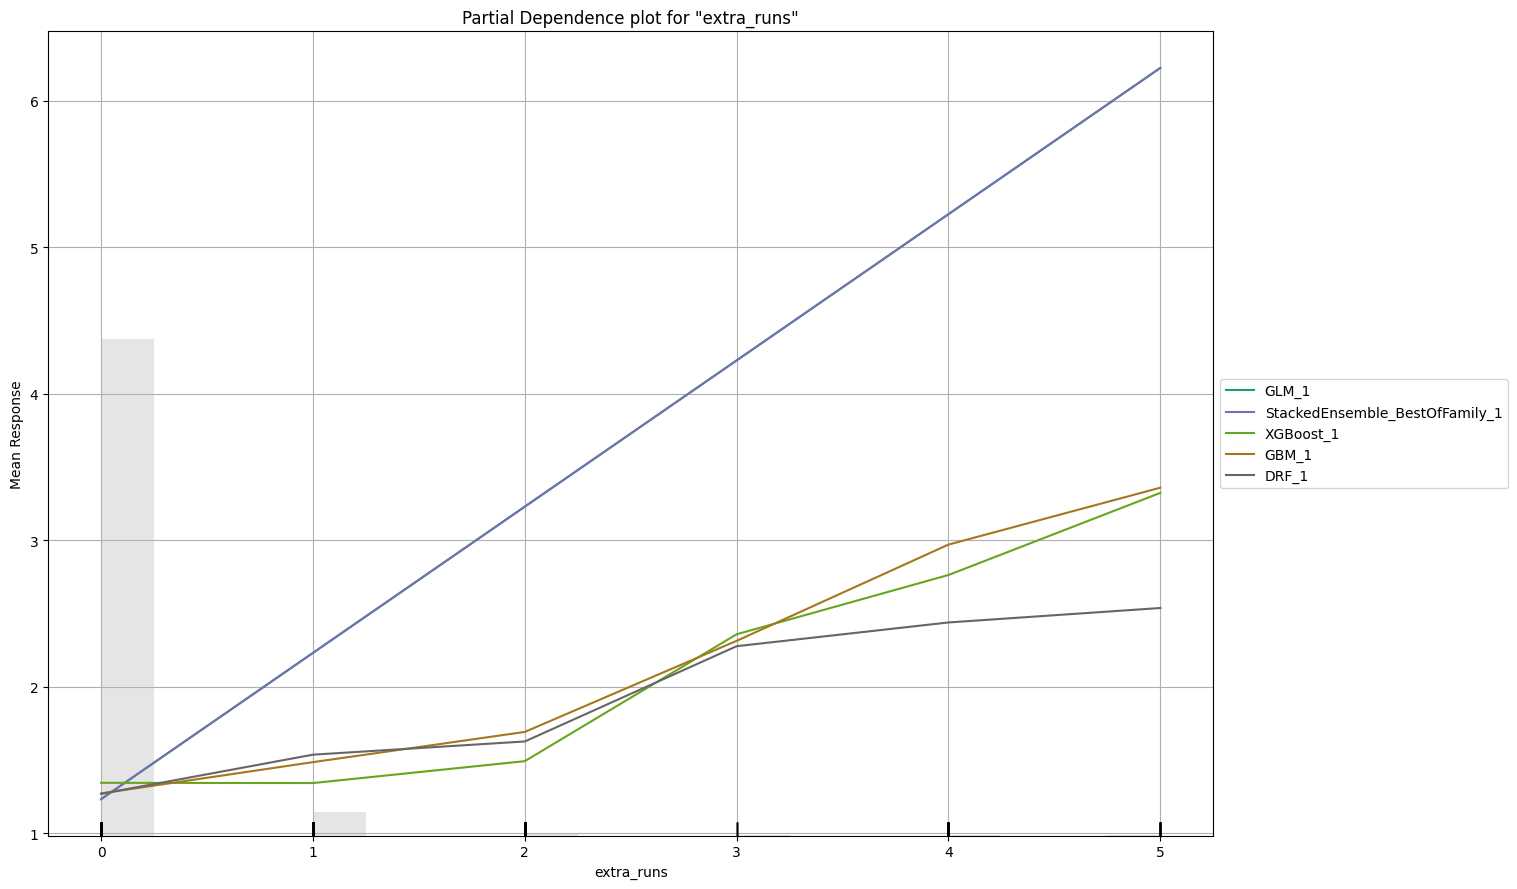

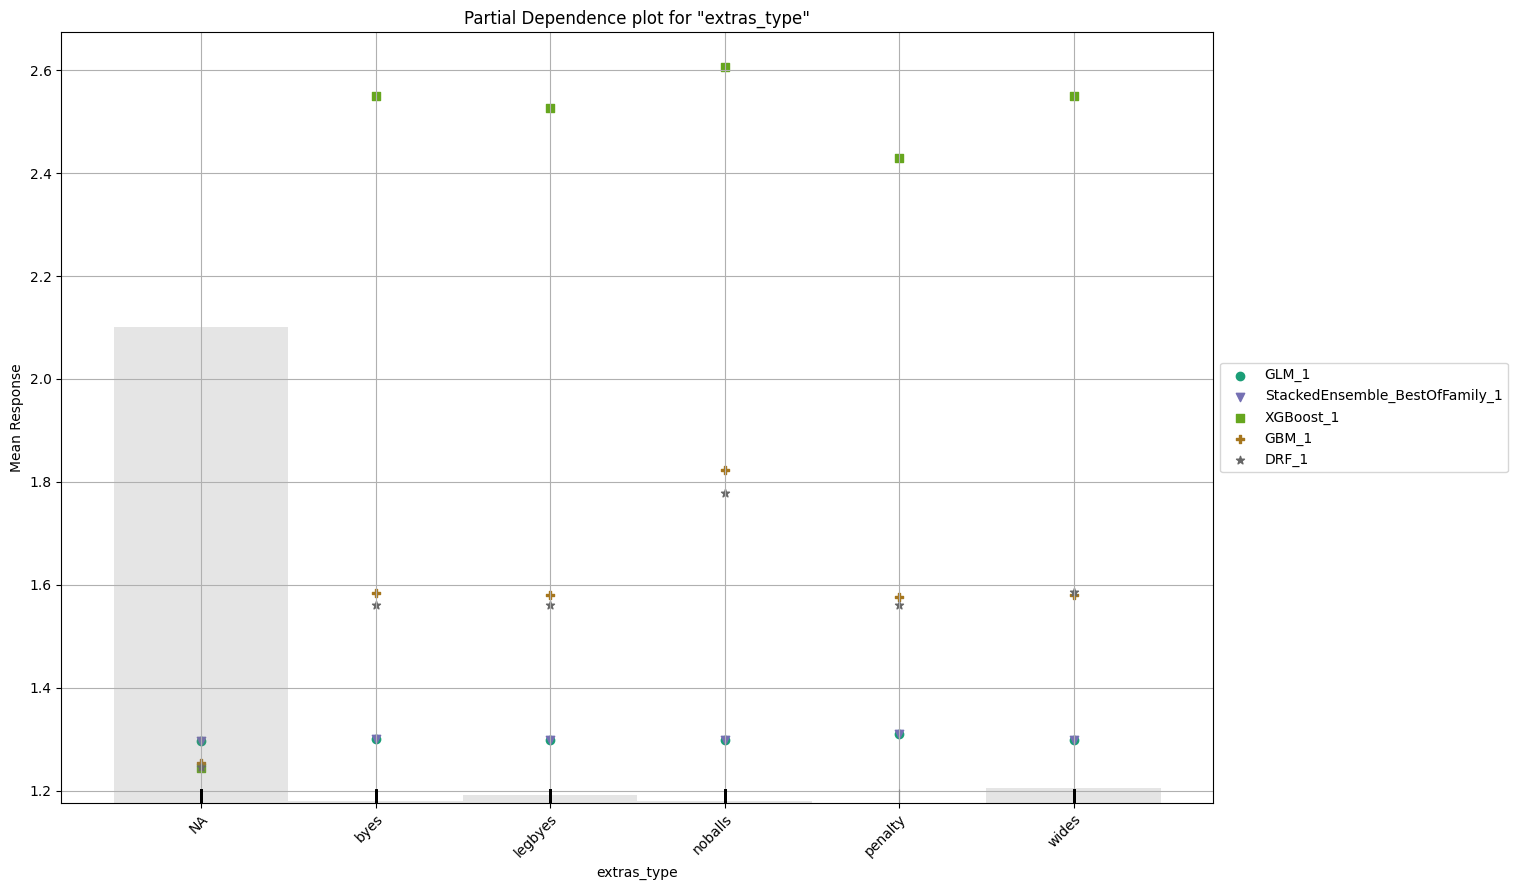

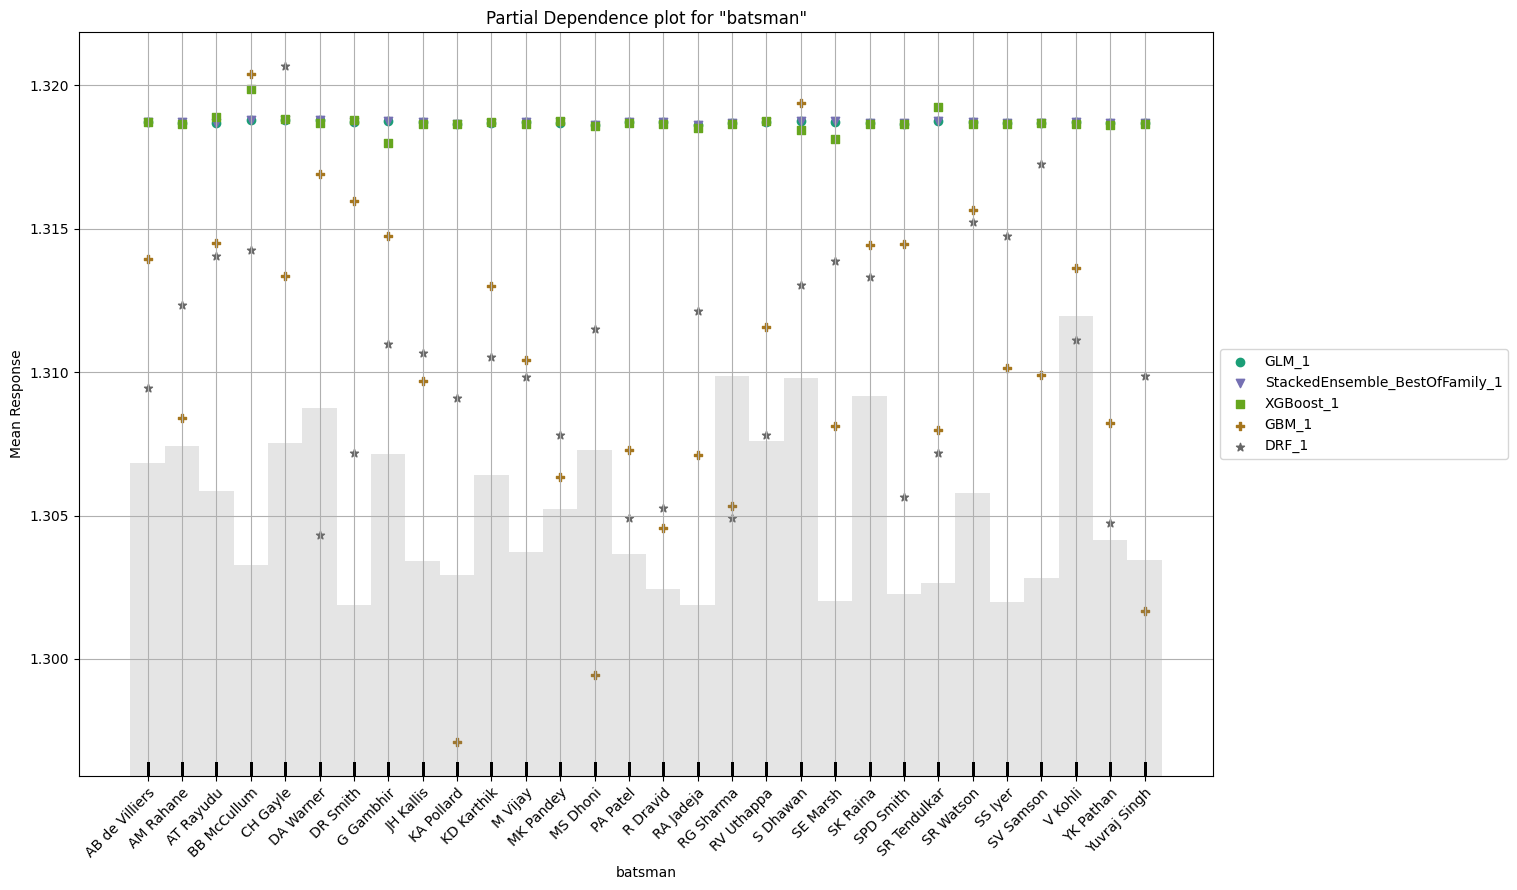

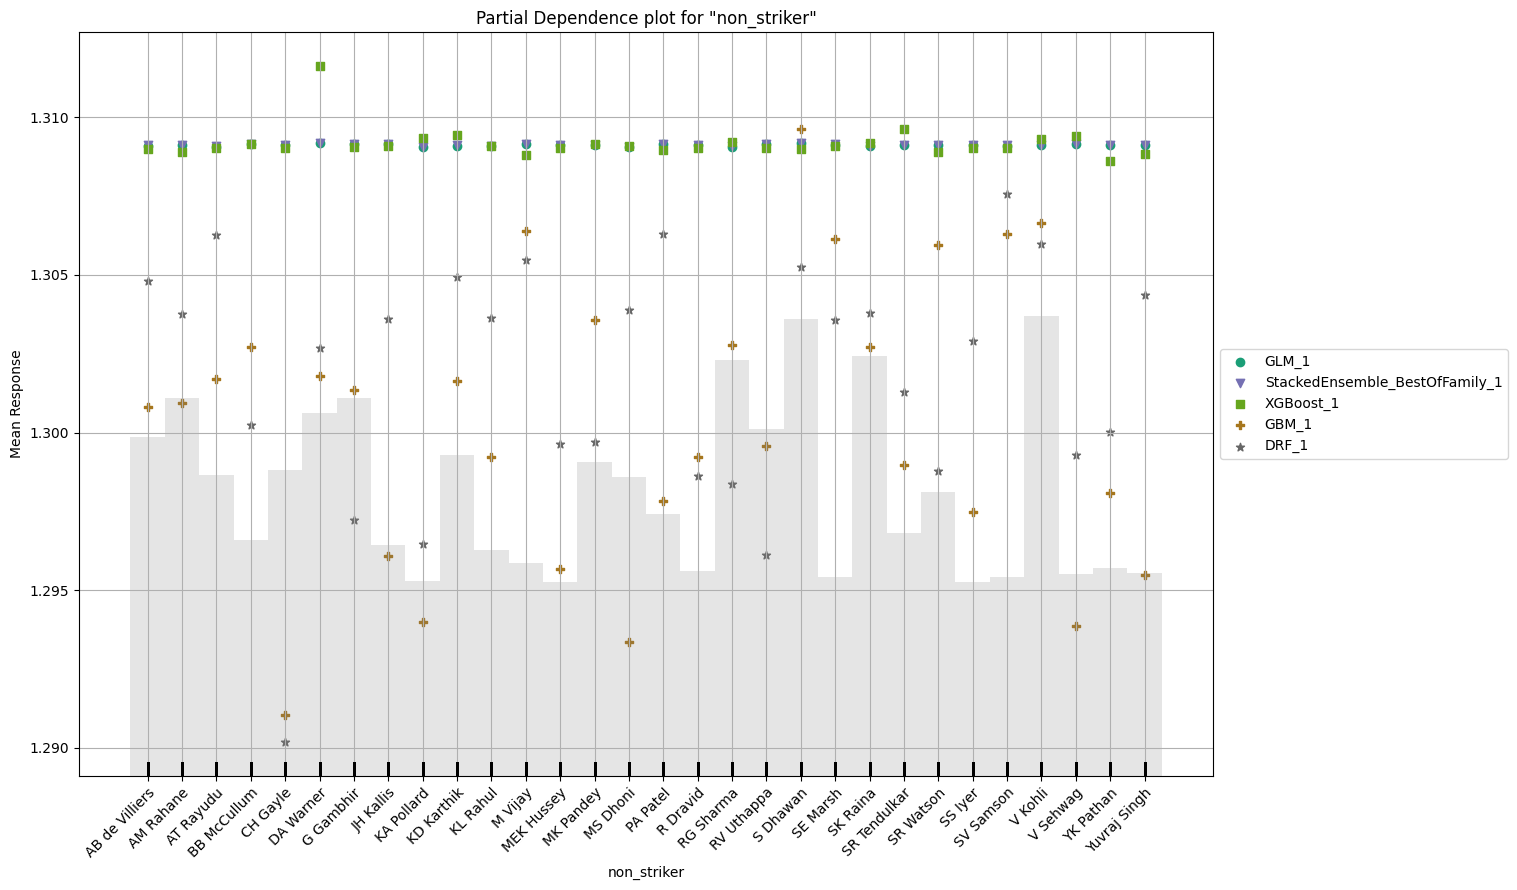

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

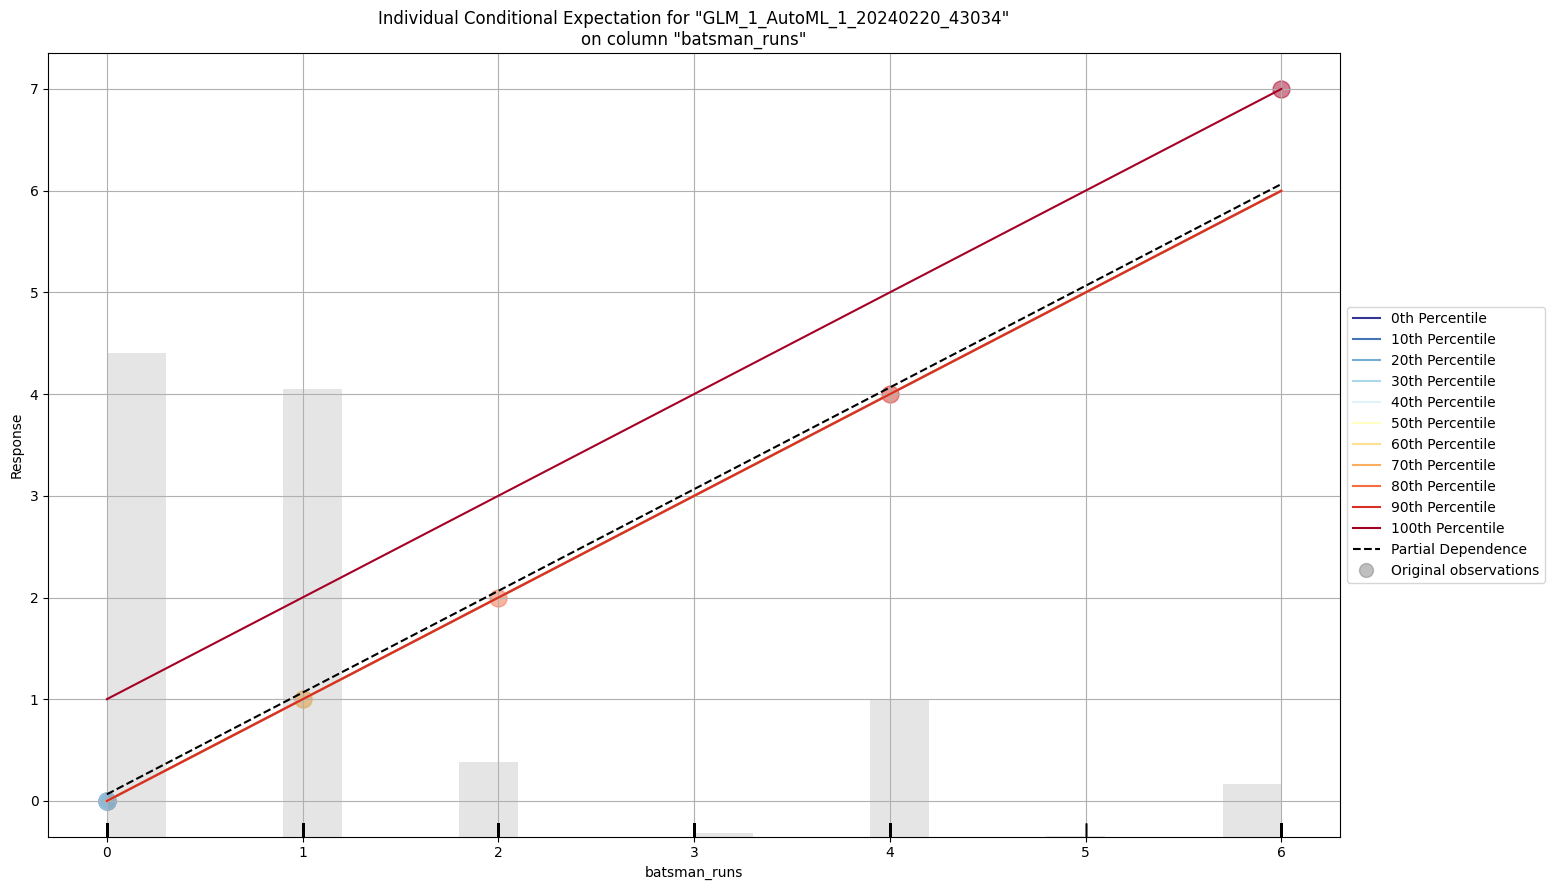

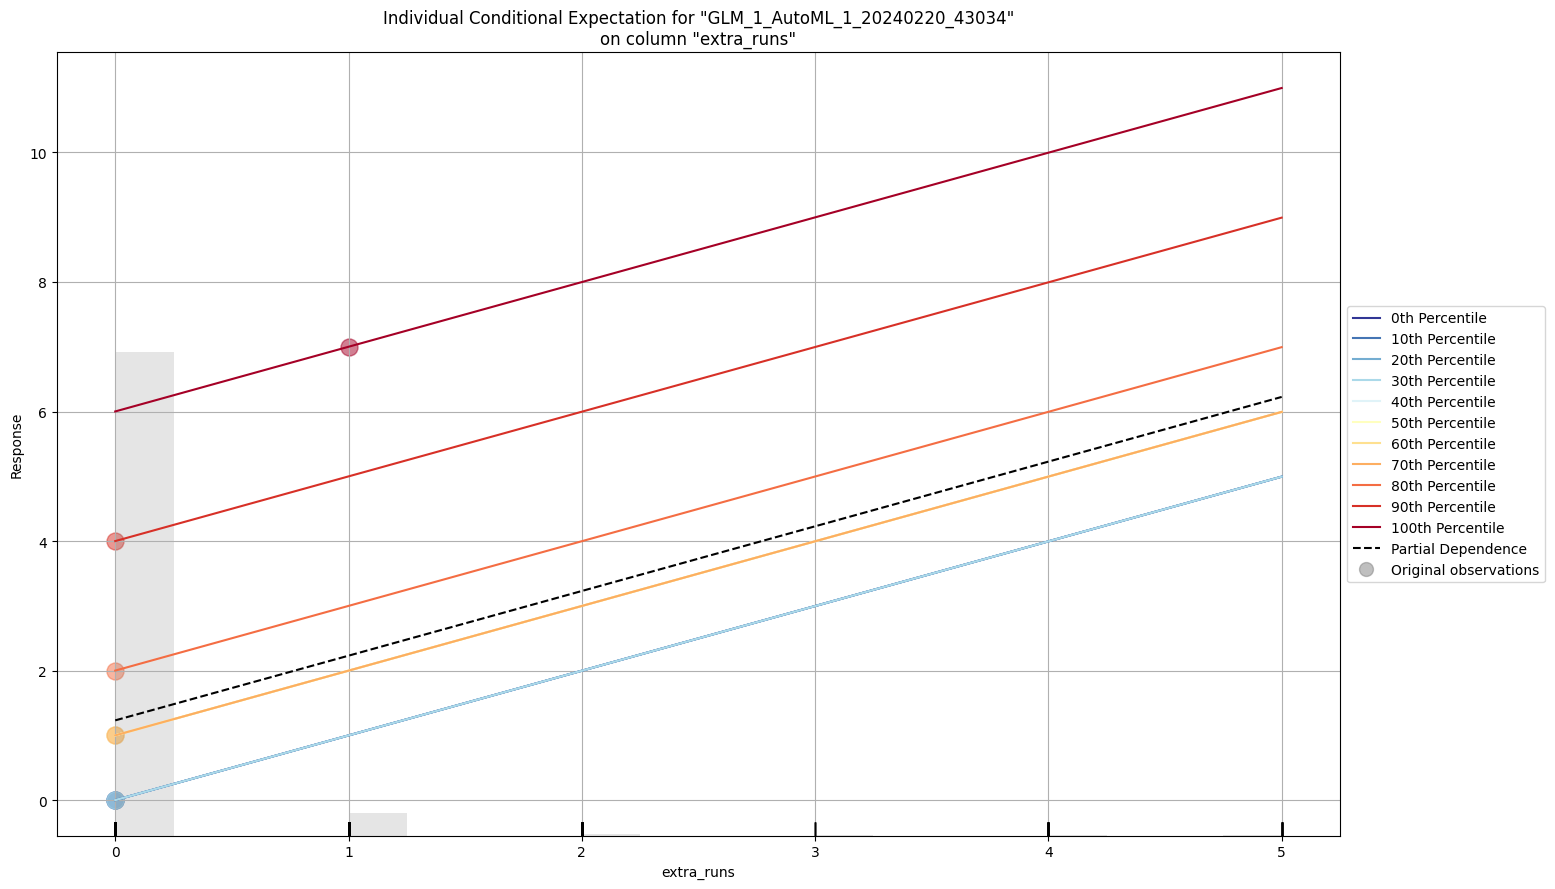

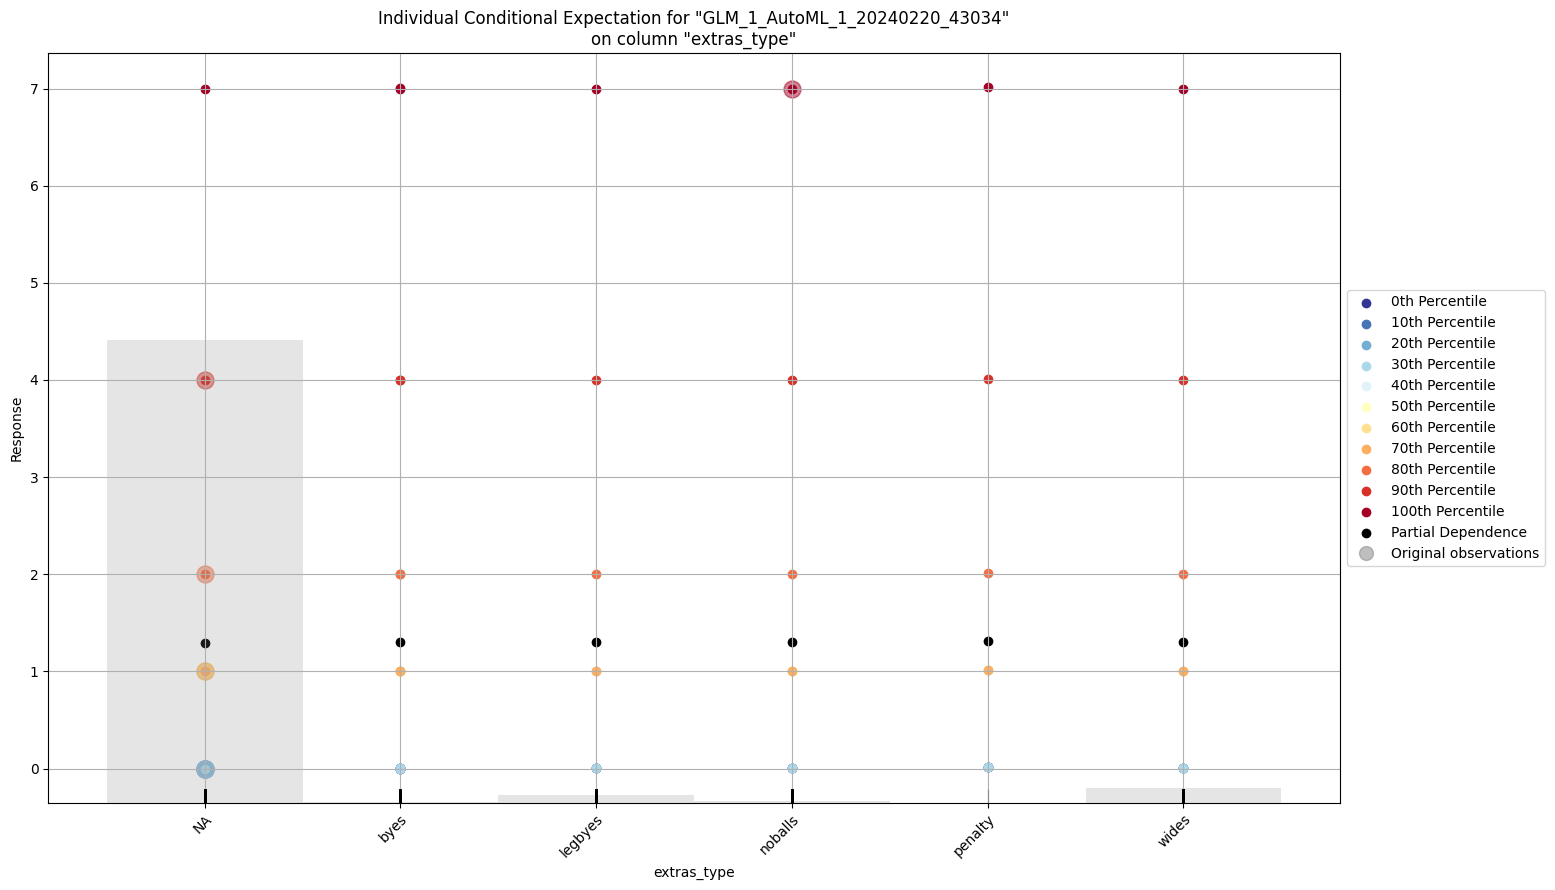

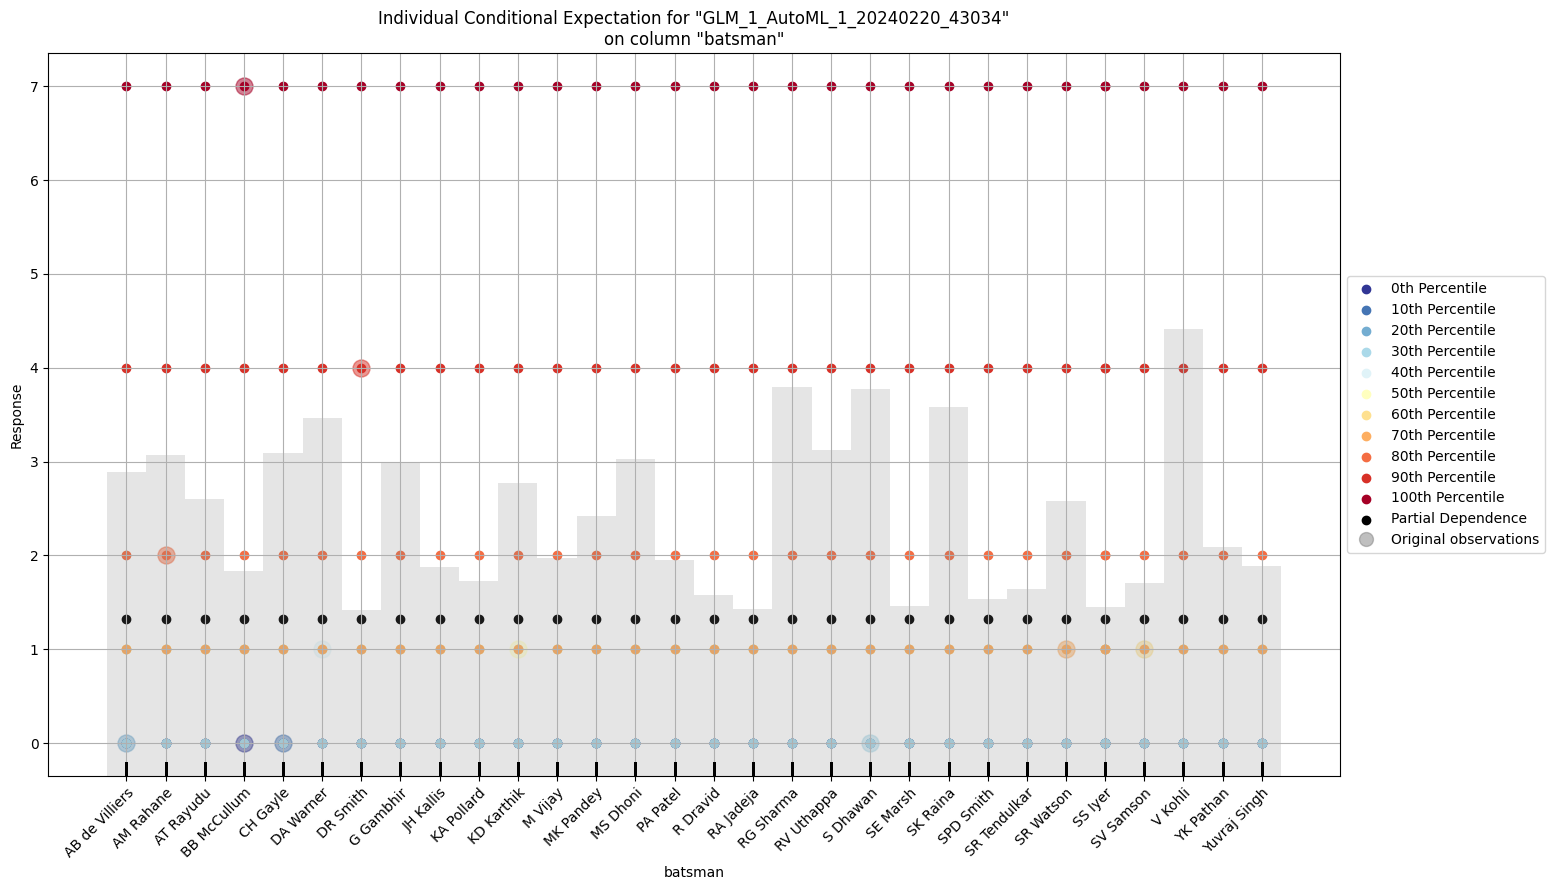

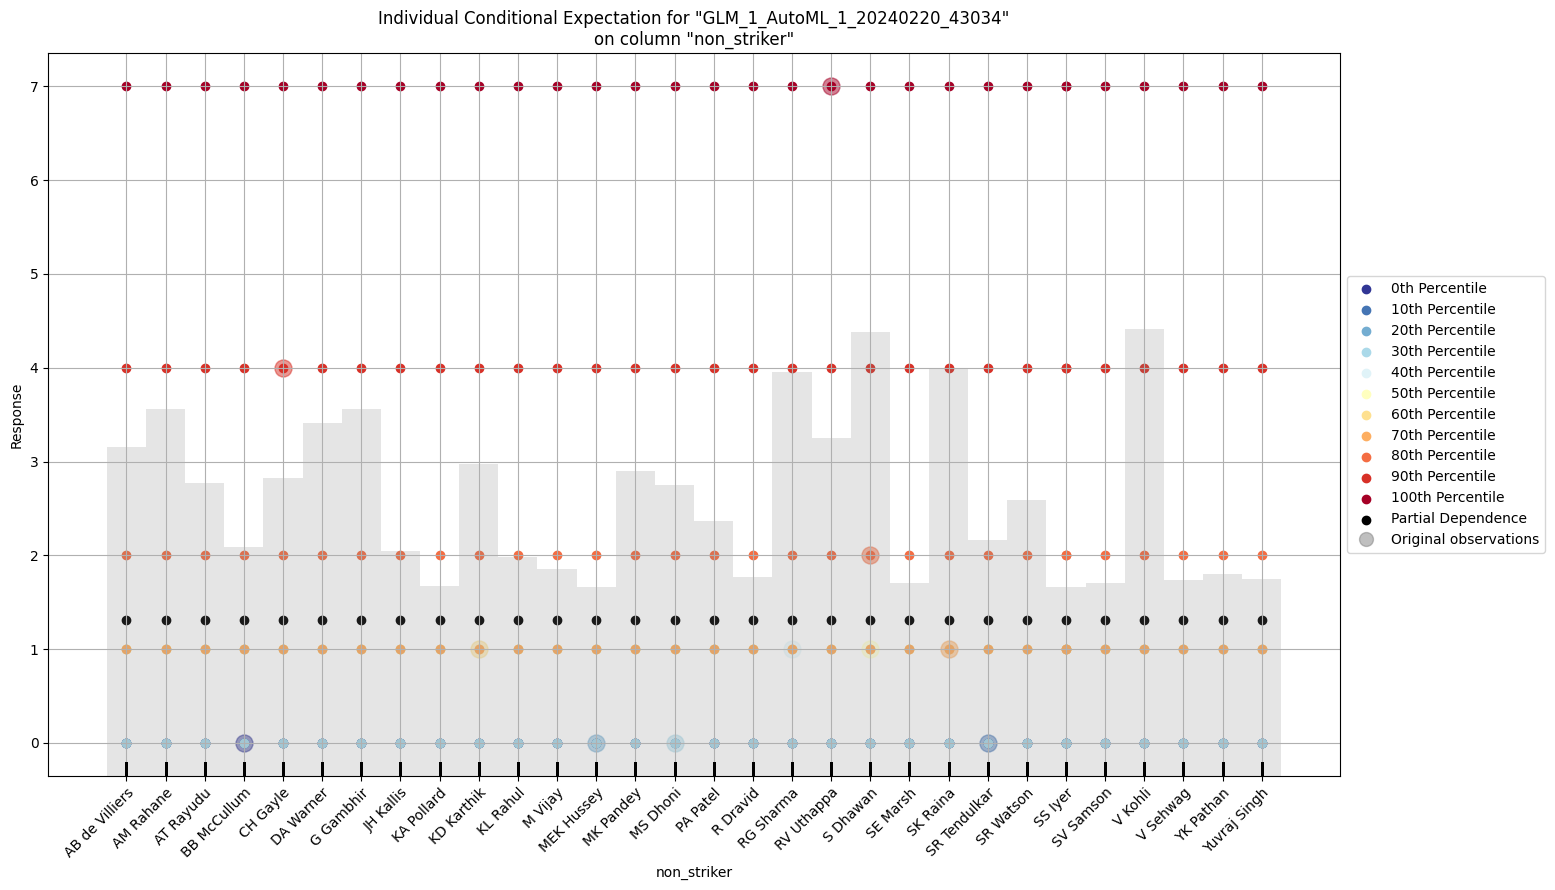

In [28]:
exa = aml.explain(df_test)

# Gradient Boosting Machine (GBM) modeling

In [29]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [30]:
house_glm_regularization.train(x=predictor_cols, y=response_col, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708403399109_13


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  2929                          2817                           1                       py_2_sid_9212

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.6001962998444633e-05
RMSE: 0.004000245367279941
MAE: 0.0010015543023774475
RMSLE: 0.0021066732136935966
Mean Residual Deviance: 1.6001962998444633e-05
R^2: 0.9996580672756031
Null degrees of freedom: 154810
Residual degrees of freedom: 151993
Null deviance: 7244.933628745076
Residual deviance: 2.477279893752212
AIC: -1264574.1935879618

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective             training_rmse         training_deviance       training_mae           training_r2
--  -------------------  ----------  ------------  -------------------------  --------------------  --------------------  ----------------------  ---------------------  ------------------
    2024-02-20 04:45:42  0.000 sec   0             7244.933628745076          0.046798571346642524
    2024-02-20 04:45:42  3.954 sec   1                                                              0.004000245367279941  1.6001962998444633e-05  0.0010015543023774475  0.9996580672756031

Variable Importances: 
variable                          relative_importance    scaled_importance     percentage
--------------------------------  ---------------------  --------------------  ---------------------
player_dismissed.NA               0.43390634655952454    1.0                   0.21081142248330872
dismissal_kind.NA                 0.43390634655952454    1.0                   0.21081142248330872
dismissal_kind.bowled             0.11573825031518936    0.2667355553401938    0.05623090184814157
dismissal_kind.lbw                0.09619472175836563    0.22169466411611788   0.04673576749927815
fielder.NA                        0.07657858729362488    0.17648644206479613   0.037205357900697726
dismissal_kind.caught and bowled  0.07344746589660645    0.169270319457129     0.03568411682896146
dismissal_kind.run out            0.0531642772257328     0.12252477440645033   0.025829621982070297
dismissal_kind.caught             0.049847133457660675   0.11487993631091657   0.024218002788496236
dismissal_kind.stumped            0.029808903113007545   0.06869893318999488   0.014482519828868614
dismissal_kind.hit wicket         0.007785855792462826   0.017943631970809948  0.0037827225802834217
---                               ---                    ---                   ---
player_dismissed.LE Plunkett      0.0                    0.0                   0.0
player_dismissed.M Ntini          0.0                    0.0                   0.0
player_dismissed.MA Wood          0.0                    0.0                   0.0
player_dismissed.ND Doshi         0.0                    0.0                   0.0
player_dismissed.RK Bhui          0.0                    0.0                   0.0
player_dismissed.S Kaushik        0.0                    0.0                   0.0
player_dismissed.S Lamichhane     0.0                    0.0                   0.0
player_dismissed.S Randiv         0.0                    0.0                   0.0
player_dismissed.SE Bond          0.0                    0.0                   0.0
player_dismissed.SMSM Senanayake  0.0                    0.0                   0.0
[2929 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Assignment Questions**


* Is the relationship significant?

 Yes the relationship seems significant, the high R^2 value of 0.9996580672756031 suggests a significant relationship between the predictors and the response variable. This indicates that the model explains nearly all the variability of the response data around its mean and also as the "batsman_runs" and "total_runs" do make up the most part of the "total_runs" and is valid.

 The presence of large SHAP values for certain features suggests that the model is finding significant relationships between these features and the target variable. The fact that "batsman_runs=0.0" has a large negative SHAP value indicates it is an important feature in the prediction.

* Are any model assumptions violated?
  
  No they are not because we assumed "batsman_runs" and "total_runs" as the variables and it proved right in this context.

* Is there any multicollinearity in the model?
  
  Yes there is. "batsman_runs" and "total_runs" go hand in hand. Correlation Matric and the Variable Importance plot shows the relative importance of the most important variables in the model and from that we can see there is multicollinearity.

* In the multivariate models are predictor variables independent of all the other predictor variables?

No, they are dependant. From the Variable Importance plot we can see plent

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

  The variable importances listed show that "player_dismissed.NA" and "dismissal_kind.NA" are the most significant predictors.

* Does the model make sense?

  he model seems to make sense due to the high R^2 value, but one must be cautious of overfitting, especially since there are a large number of predictors relative to the number of observations.

* Does regularization help?

  Regularization helps to prevent overfitting, especially in a model with a large number of predictors. Hence Ridge regularization is used here, as it  suggests that the model's complexity is being controlled for, which is typically beneficial.

* Which independent variables are significant?

  The significant variables are likely those with the highest relative importances, such as "batsman_runs" and "extra_runs". We can see batsman_runs	is 1.6109147 and	0.7643862 extra_runs

* Which hyperparameters are important?

  The lambda value in Ridge regularization is an important hyperparameter.



# **References:**
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/
all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - www.openai.com/chatgpt

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

# **License**
MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.